In [1]:
# Part one: Data Preprocessing
# Basic preprocessing method include encoding y labels using LabelEncoder, spliting training and testing data and standardizing to ensure everyone's preprocessed data aligned with each other.
# Since there is no missing values in the dataset, we don't need to do any imputation.
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_excel('Dry_Bean_Dataset.xlsx')

X = data.drop(columns = ['Class'])
y = data['Class']

# label_encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Print the class numbers and the correspond class names
print("Class numbers:", np.unique(y_encoded))
print("Class names:", label_encoder.classes_)

# train_test_split and standardization
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, shuffle=True)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


Class numbers: [0 1 2 3 4 5 6]
Class names: ['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


In [2]:
# Part one: Data Preprocessing
# Advanced preprocessing method include remove outliers, add noise and augment data
def remove_outliers_iqr(X, threshold=1.5):
    """Apply IQR method to remove outliers"""
    Q1 = np.percentile(X, 25, axis=0)
    Q3 = np.percentile(X, 75, axis=0)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    mask = np.all((X >= lower_bound) & (X <= upper_bound), axis=1)
    return X[mask], mask

def add_gaussian_noise(X, mean=0.0, std=0.01):
    """Add Gaussian noise to the data"""
    noise = np.random.normal(mean, std, X.shape)
    return X + noise

def augment_data(X, y, copies=1, noise_std=0.01):
    """Data augmentation by adding Gaussian noise and duplicating data"""
    augmented_X = [X]
    augmented_y = [y]
    for _ in range(copies):
        noisy_X = add_gaussian_noise(X, std=noise_std)
        augmented_X.append(noisy_X)
        augmented_y.append(y)
    return np.vstack(augmented_X), np.vstack(augmented_y)


train_indices = X_train.index 
test_indices = X_test.index    
X_scaled = np.empty_like(X, dtype=np.float64)


X_scaled[train_indices] = X_train_scaled
X_scaled[test_indices] = X_test_scaled

X_no_outliers, mask = remove_outliers_iqr(X_scaled, threshold=1.5)
y_encoded_no_outliers = y_encoded[mask]
X_noisy = add_gaussian_noise(X_no_outliers, std=0.02)

X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(
    X_noisy, y_encoded_no_outliers, test_size=0.2, random_state=42
)


正在计算2D t-SNE...


c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
Exception in thread Thread-4 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 4: invalid continuation byte
C:\Users\DFVJGJ\AppData\Local\Temp\ipyker

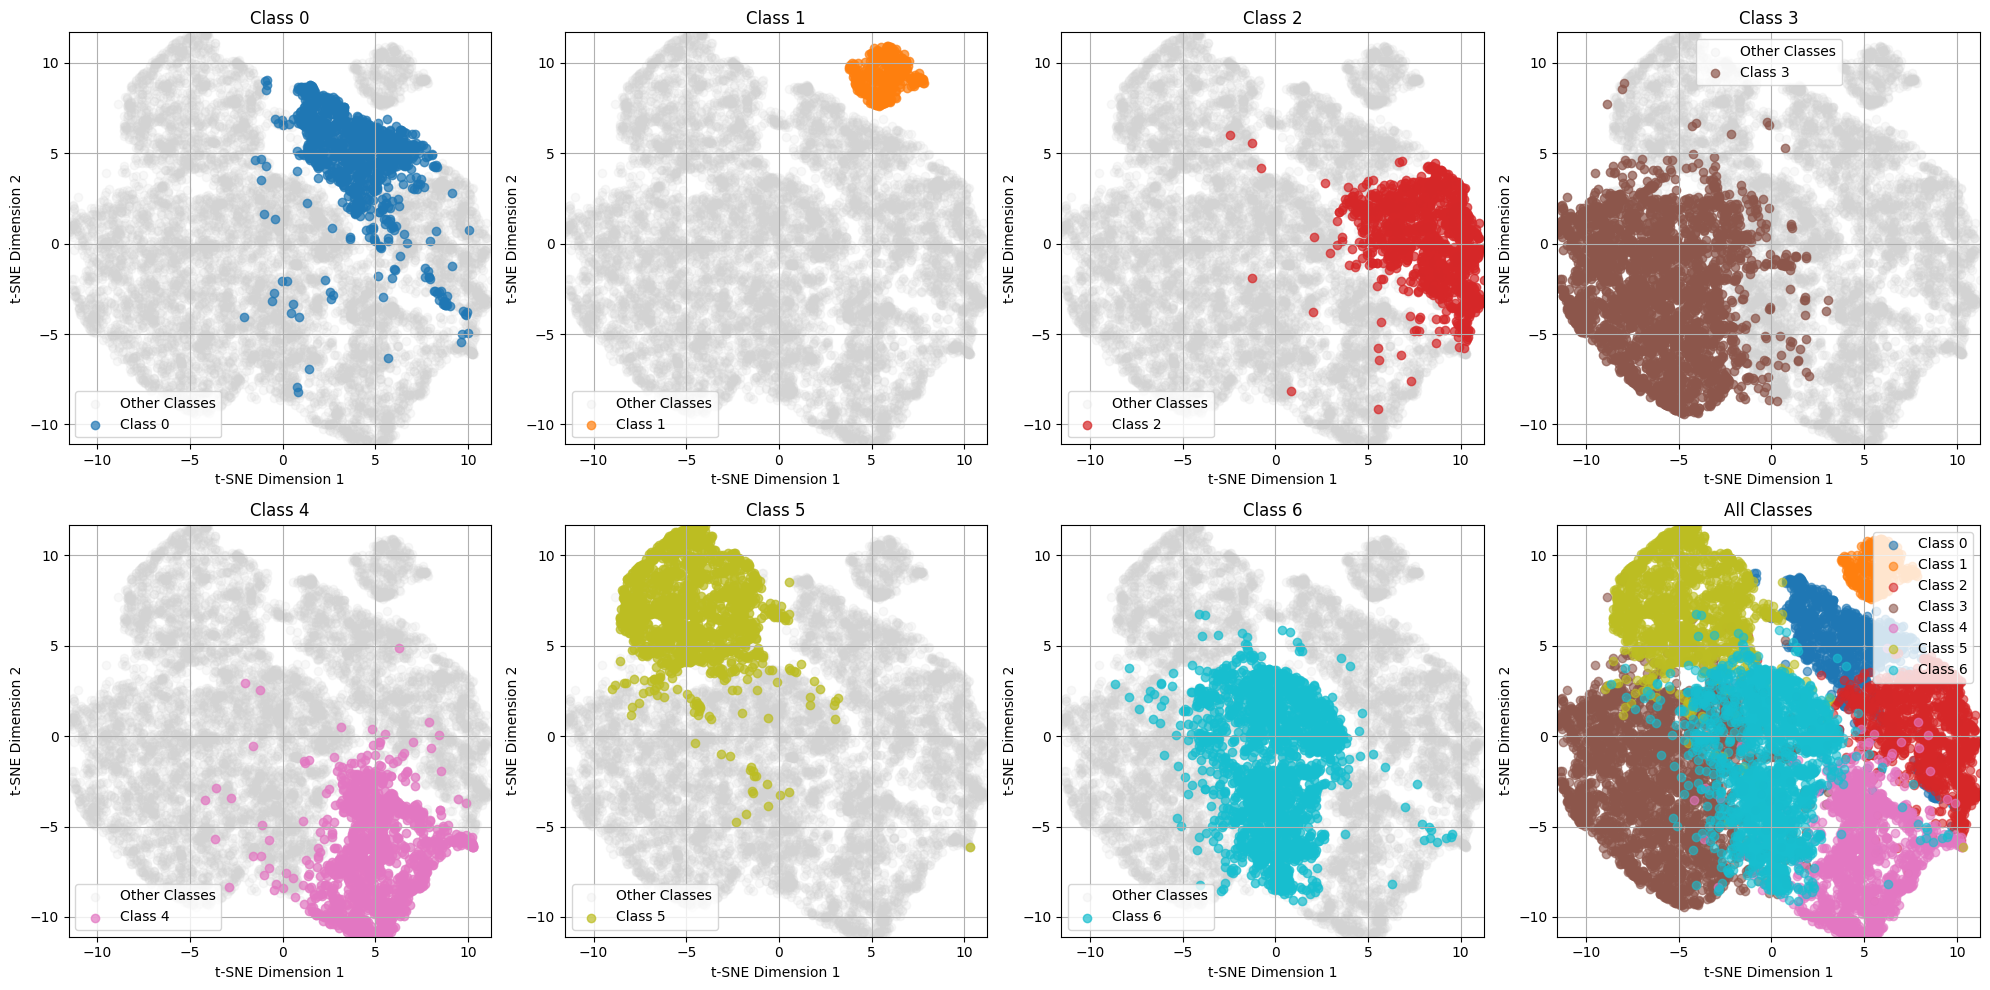

正在计算3D t-SNE...


c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\DFVJGJ\AppData\Local\Temp\ipykernel_10080\2568737727.py:79: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10',  len(np.unique(y_numeric)))


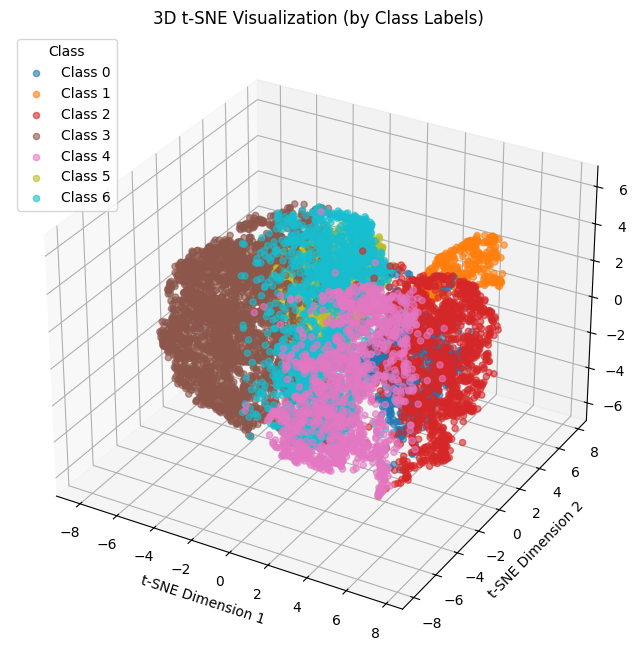

In [3]:
# Part two: Data Visualization
# Plot the t-SNE projecion using basic preprocessed data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import os


def visualize_2d_tsne(X, y_numeric, save_path='visual_pict'):
    print("正在计算2D t-SNE...")
    tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
    X_tsne_2d = tsne_2d.fit_transform(X)

    os.makedirs(save_path, exist_ok=True)

    unique_classes = np.unique(y_numeric)
    n_classes = len(unique_classes)

    # Prepare 2x4 subplots
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    cmap = plt.cm.get_cmap('tab10', n_classes)

    # Find global axis limits for consistent scaling
    x_min, x_max = X_tsne_2d[:, 0].min(), X_tsne_2d[:, 0].max()
    y_min, y_max = X_tsne_2d[:, 1].min(), X_tsne_2d[:, 1].max()

    # Plot each class separately, but show all points in gray for context
    for i, class_label in enumerate(unique_classes):
        row, col = divmod(i, 4)
        ax = axes[row, col]
        # Plot all points in light gray
        ax.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], alpha=0.15, color='lightgray', label='Other Classes')
        # Highlight current class
        idx = y_numeric == class_label
        ax.scatter(X_tsne_2d[idx, 0], X_tsne_2d[idx, 1],
                   alpha=0.7, color=cmap(i), label=f'Class {class_label}')
        ax.set_title(f'Class {class_label}')
        ax.set_xlabel('t-SNE Dimension 1')
        ax.set_ylabel('t-SNE Dimension 2')
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.legend()
        ax.grid(True)

    # Plot the whole graph in (2,4)
    ax = axes[1, 3]
    for i, class_label in enumerate(unique_classes):
        idx = y_numeric == class_label
        ax.scatter(X_tsne_2d[idx, 0], X_tsne_2d[idx, 1],
                   alpha=0.6, color=cmap(i), label=f'Class {class_label}')
    ax.set_title('All Classes')
    ax.set_xlabel('t-SNE Dimension 1')
    ax.set_ylabel('t-SNE Dimension 2')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.legend()
    ax.grid(True)

    # Hide unused subplot if n_classes < 7
    for j in range(n_classes, 7):
        row, col = divmod(j, 4)
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.savefig(f'{save_path}/tsne_label_2d_all.png', dpi=300, bbox_inches='tight')
    plt.show()

def visualize_3d_tsne(X, y_numeric, save_path='visual_pict'):
    print("正在计算3D t-SNE...")
    tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=300)
    X_tsne_3d = tsne_3d.fit_transform(X)

    os.makedirs(save_path, exist_ok=True)


    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    cmap = plt.cm.get_cmap('tab10',  len(np.unique(y_numeric)))

    for i, class_label in enumerate(np.unique(y_numeric)):
        idx = y_numeric == class_label
        ax.scatter(X_tsne_3d[idx, 0], X_tsne_3d[idx, 1], X_tsne_3d[idx, 2],
                   alpha=0.6, color=cmap(i), label=f'Class {i}')
        

    ax.set_title('3D t-SNE Visualization (by Class Labels)')
    ax.set_xlabel('t-SNE Dimension 1')
    ax.set_ylabel('t-SNE Dimension 2')
    ax.set_zlabel('t-SNE Dimension 3')
    ax.legend(title='Class', loc='upper left')
    plt.savefig(f'{save_path}/tsne_label_3d_all.png', dpi=300, bbox_inches='tight')
    plt.show()

visualize_2d_tsne(X_train_scaled, y_train)
visualize_3d_tsne(X_train_scaled, y_train) 

In [4]:
# Part two: Data Visualization
# Interactive t-SNE visualization using Plotly
import plotly.express as px
import plotly.io as pio
import os
from sklearn.manifold import TSNE
import numpy as np

def visualize_2d_tsne_interactive(X, y_numeric, save_path='visual_pict'):
    print("2D t-SNE...")
    tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
    X_tsne_2d = tsne_2d.fit_transform(X)

    os.makedirs(save_path, exist_ok=True)

    fig = px.scatter(
        x=X_tsne_2d[:, 0], 
        y=X_tsne_2d[:, 1], 
        color=[str(label) for label in y_numeric],
        labels={'color': 'Class'},
        hover_name=[f"Sample {i} - Class {label}" for i, label in enumerate(y_numeric)],
        title="2D t-SNE Interactive Visualization",
        color_discrete_sequence=px.colors.qualitative.Dark24
    )
    
    fig.update_layout(
        width=900,
        height=700,
        template="plotly_white"
    )

    fig.show()


def visualize_3d_tsne_interactive(X, y_numeric, save_path='visual_pict'):
    print("3D t-SNE...")
    tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=300)
    X_tsne_3d = tsne_3d.fit_transform(X)

    os.makedirs(save_path, exist_ok=True)

    fig = px.scatter_3d(
        x=X_tsne_3d[:, 0],
        y=X_tsne_3d[:, 1],
        z=X_tsne_3d[:, 2],
        color=[str(label) for label in y_numeric],
        labels={'color': 'Class'},
        hover_name=[f"Sample {i} - Class {label}" for i, label in enumerate(y_numeric)],
        title="3D t-SNE Interactive Visualization",
        color_discrete_sequence=px.colors.qualitative.Dark24
    )
    
    fig.update_layout(
        width=1000,
        height=800,
        template="plotly_white"
    )

    # fig.write_html(f"{save_path}/tsne_3d_interactive.html")
    fig.show()


visualize_2d_tsne_interactive(X_train_scaled, y_train)
visualize_3d_tsne_interactive(X_train_scaled, y_train)


2D t-SNE...


c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


3D t-SNE...


c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



2D PCA...


C:\Users\DFVJGJ\AppData\Local\Temp\ipykernel_10080\963221847.py:17: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



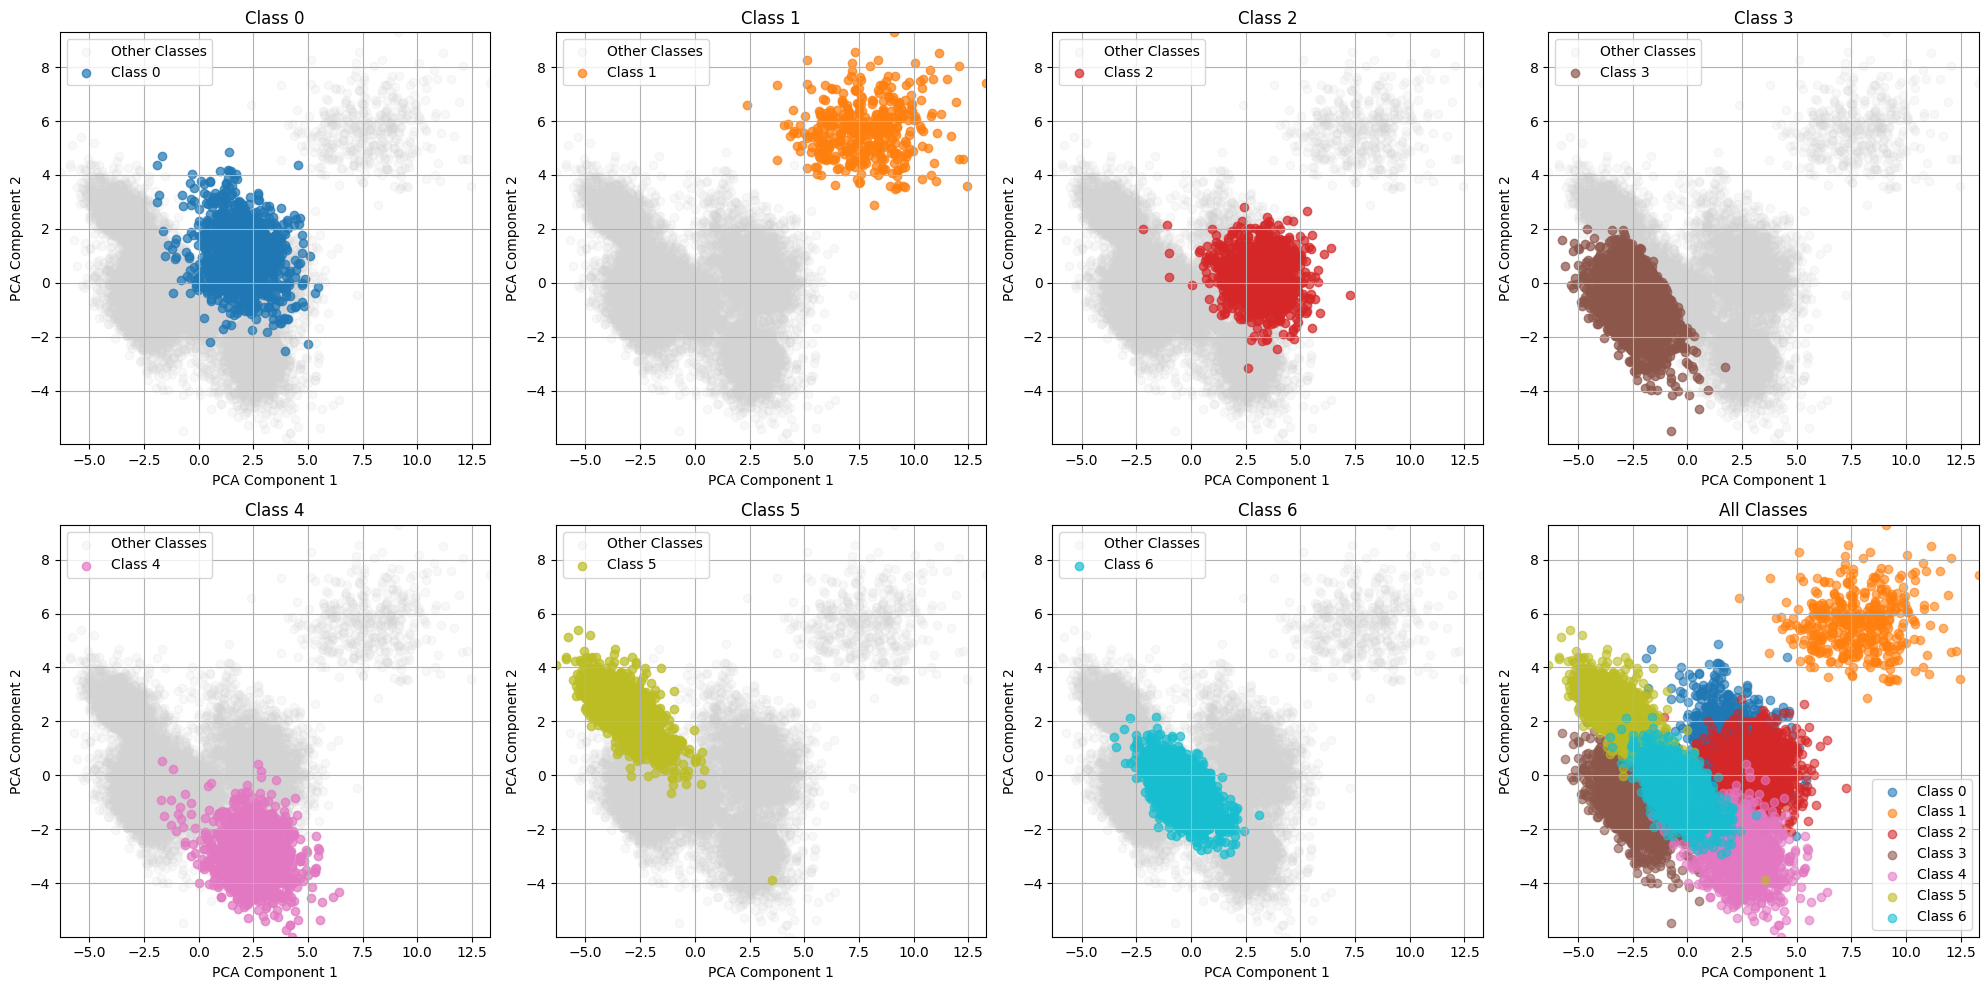

3D PCA...


C:\Users\DFVJGJ\AppData\Local\Temp\ipykernel_10080\963221847.py:71: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



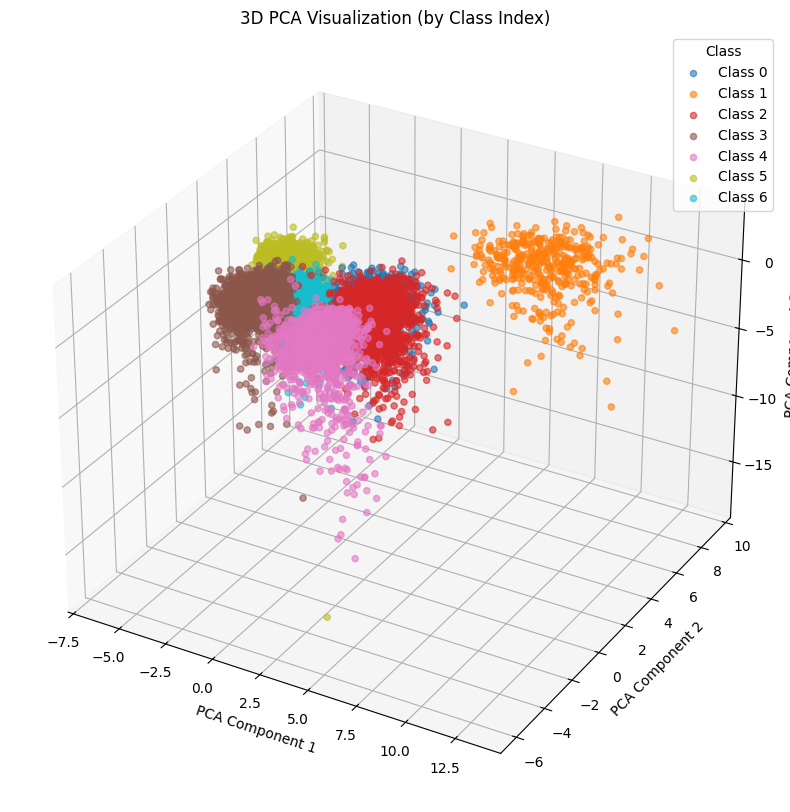

In [5]:
# Part two: Data Visualization
# Apply PCA for dimensionality reduction and visualize the 2D, 3D results
from sklearn.decomposition import PCA

def visualize_2d_pca(X, y_numeric, save_path='visual_pict'):
    print("2D PCA...")
    pca_2d = PCA(n_components=2)
    X_pca_2d = pca_2d.fit_transform(X)

    os.makedirs(save_path, exist_ok=True)

    unique_classes = np.unique(y_numeric)
    n_classes = len(unique_classes)

    # Prepare 2x4 subplots
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    cmap = plt.cm.get_cmap('tab10', n_classes)

    # Find global axis limits for consistent scaling
    x_min, x_max = X_pca_2d[:, 0].min(), X_pca_2d[:, 0].max()
    y_min, y_max = X_pca_2d[:, 1].min(), X_pca_2d[:, 1].max()

    # Plot each class separately, but show all points in gray for context
    for i, class_label in enumerate(unique_classes):
        row, col = divmod(i, 4)
        ax = axes[row, col]
        # Plot all points in light gray
        ax.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.15, color='lightgray', label='Other Classes')
        # Highlight current class
        idx = y_numeric == class_label
        ax.scatter(X_pca_2d[idx, 0], X_pca_2d[idx, 1],
                   alpha=0.7, color=cmap(i), label=f'Class {class_label}')
        ax.set_title(f'Class {class_label}')
        ax.set_xlabel('PCA Component 1')
        ax.set_ylabel('PCA Component 2')
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.legend()
        ax.grid(True)

    # Plot the whole graph in (2,4)
    ax = axes[1, 3]
    for i, class_label in enumerate(unique_classes):
        idx = y_numeric == class_label
        ax.scatter(X_pca_2d[idx, 0], X_pca_2d[idx, 1],
                   alpha=0.6, color=cmap(i), label=f'Class {class_label}')
    ax.set_title('All Classes')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.legend()
    ax.grid(True)

    # Hide unused subplot if n_classes < 7
    for j in range(n_classes, 7):
        row, col = divmod(j, 4)
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.savefig(f'{save_path}/pca_label_2d_all.png', dpi=300, bbox_inches='tight')
    plt.show()

def visualize_3d_pca(X, y_numeric, save_path='visual_pict'):
    print("3D PCA...")
    pca_3d = PCA(n_components=3)
    X_pca_3d = pca_3d.fit_transform(X)

    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    cmap = plt.cm.get_cmap('tab10', len(np.unique(y_numeric)))

    for i in np.unique(y_numeric):
        idx = y_numeric == i
        ax.scatter(X_pca_3d[idx, 0], X_pca_3d[idx, 1], X_pca_3d[idx, 2],
                   alpha=0.6, c=[cmap(i)], label=f'Class {i}')

    ax.set_title('3D PCA Visualization (by Class Index)')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_zlabel('PCA Component 3')
    ax.legend(title='Class', loc='best')
    plt.savefig(f'{save_path}/pca_label_3d.png', dpi=300, bbox_inches='tight')
    plt.show()


visualize_2d_pca(X_train_scaled, y_train)
visualize_3d_pca(X_train_scaled, y_train)


In [6]:
# Part three: Clustering
# Construct a relatively complete clustering evaluation function
# to evaluate the clustering performance from external and internal metrics
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score, v_measure_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np
from collections import Counter

def purity_score(y_true, y_pred):
    cluster_labels = np.unique(y_pred)
    total_correct = 0
    for cluster in cluster_labels:
        idx = np.where(y_pred == cluster)
        true_labels, counts = np.unique(y_true[idx], return_counts=True)
        total_correct += np.max(counts)
    return total_correct / len(y_true)

from scipy.spatial.distance import cdist
import numpy as np

def dunn_index(X, labels):
    clusters = np.unique(labels)
    cluster_data = [X[labels == c] for c in clusters]
    
    # the maximum distance within each cluster
    intra_dists = [np.max(cdist(c, c)) for c in cluster_data if len(c) > 1]
    max_intra = max(intra_dists) if intra_dists else 1e-10
    
    # the minimum distance between clusters
    min_inter = np.inf
    for i in range(len(cluster_data)):
        for j in range(i + 1, len(cluster_data)):
            dist = np.min(cdist(cluster_data[i], cluster_data[j]))
            min_inter = min(min_inter, dist)
    
    return min_inter / max_intra


def evaluate_clustering(X, y_true, y_pred):
    print(" external metric:")
    print(f"  ARI  (Adjusted Rand Index):     {adjusted_rand_score(y_true, y_pred):.4f}")
    print(f"  NMI  (Normalized Mutual Info):  {normalized_mutual_info_score(y_true, y_pred):.4f}")
    print(f"  FMI  (Fowlkes-Mallows Index):   {fowlkes_mallows_score(y_true, y_pred):.4f}")
    print(f"  V-measure:                     {v_measure_score(y_true, y_pred):.4f}")
    print(f"  Purity:                        {purity_score(y_true, y_pred):.4f}")
    
    print("\n internal metric")
    print(f"  Silhouette Score:               {silhouette_score(X, y_pred):.4f}")
    print(f"  Calinski-Harabasz Index:        {calinski_harabasz_score(X, y_pred):.2f}")
    print(f"  Davies-Bouldin Index:           {davies_bouldin_score(X, y_pred):.4f}")
    print(f"  Dunn Index:                     {dunn_index(X, y_pred):.4f}")


In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

def visualize_clusters(X, cluster_labels, title="Cluster Visualization"):
    # map cluster labels to colors
    cluster_labels = LabelEncoder().fit_transform(cluster_labels)

    # PCA 
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)

    # plotting
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, cmap='tab10', s=30)
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(scatter, label='Cluster Label')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [8]:
# Part three: Clustering
# Prototype-based Clustering
# Apply KMeans clustering and demonstrate the results
from sklearn.cluster import KMeans

def apply_kmeans(X, n_clusters=7, random_state=42):
    print("Applying K-Means clustering...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init='auto')
    cluster_labels = kmeans.fit_predict(X)
    return cluster_labels

kmeans_labels = apply_kmeans(X_train_scaled, n_clusters=7)



print(" K-Means clustering outcome:")
evaluate_clustering(X_train_scaled, y_train, kmeans_labels)

Applying K-Means clustering...
 K-Means clustering outcome:
 external metric:
  ARI  (Adjusted Rand Index):     0.6640
  NMI  (Normalized Mutual Info):  0.7102
  FMI  (Fowlkes-Mallows Index):   0.7240
  V-measure:                     0.7102
  Purity:                        0.7960

 internal metric
  Silhouette Score:               0.3094
  Calinski-Harabasz Index:        6238.77
  Davies-Bouldin Index:           1.0983
  Dunn Index:                     0.0080


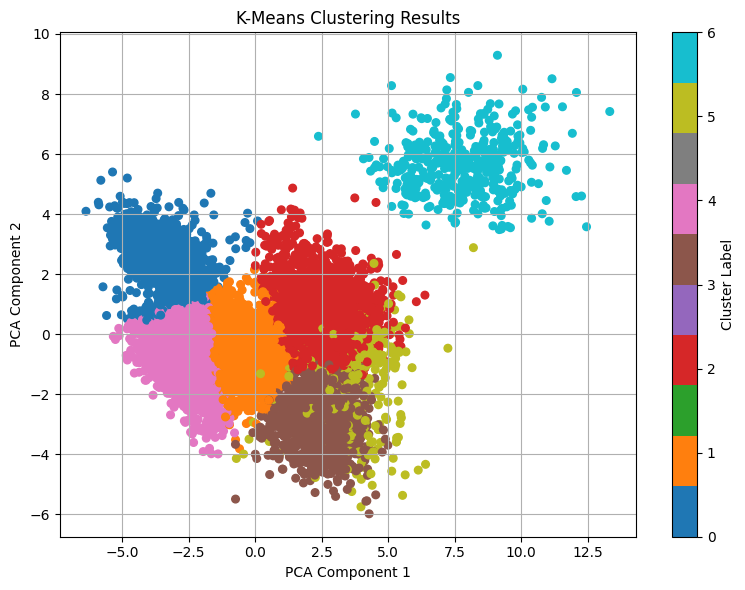

In [9]:
# Part three: Clustering
# Visualize the K-Means clustering results
visualize_clusters(X_train_scaled, kmeans_labels, title="K-Means Clustering Results")

In [10]:
# Part three: Clustering
# Prototype-based Clustering
# Apply K-Medoids clustering and demonstrate the results
from sklearn_extra.cluster import KMedoids  # 需要安装scikit-learn-extra
import numpy as np

def apply_kmedoids_clustering(X, n_clusters=10, metric='euclidean'):
    print("Applying K-Medoids clustering...")
    kmedoids = KMedoids(n_clusters=n_clusters, metric=metric, random_state=42)
    cluster_labels = kmedoids.fit_predict(X)
    return cluster_labels


print(" K-Medoids clustering outcome:")
kmedoids_labels = apply_kmedoids_clustering(X_train_scaled, n_clusters=7)
evaluate_clustering(X_train_scaled, y_train, kmedoids_labels)

 K-Medoids clustering outcome:
Applying K-Medoids clustering...
 external metric:
  ARI  (Adjusted Rand Index):     0.6363
  NMI  (Normalized Mutual Info):  0.6853
  FMI  (Fowlkes-Mallows Index):   0.6984
  V-measure:                     0.6853
  Purity:                        0.8136

 internal metric
  Silhouette Score:               0.2694
  Calinski-Harabasz Index:        4266.29
  Davies-Bouldin Index:           1.3033
  Dunn Index:                     0.0071


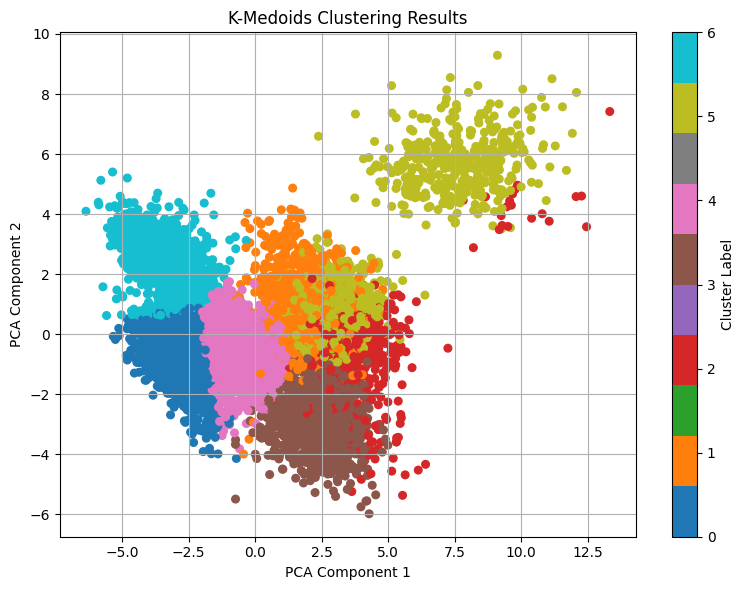

In [11]:
# Part three: Clustering
# visual the clustering results
visualize_clusters(X_train_scaled, kmedoids_labels, title="K-Medoids Clustering Results")

In [12]:
# Part three: Clustering
# Hierarchical Clustering
# Apply Agglomerative clustering and demonstrate the results

from sklearn.cluster import AgglomerativeClustering

def apply_hierarchical_clustering(X, n_clusters=7):
    print("Applying Hierarchical Clustering...")
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = hierarchical.fit_predict(X)
    return cluster_labels


print(" Hierarchical Clustering outcome:")
hierarchical_labels = apply_hierarchical_clustering(X_train_scaled, n_clusters=7)
evaluate_clustering(X_train_scaled, y_train, hierarchical_labels)


 Hierarchical Clustering outcome:
Applying Hierarchical Clustering...
 external metric:
  ARI  (Adjusted Rand Index):     0.6387
  NMI  (Normalized Mutual Info):  0.7187
  FMI  (Fowlkes-Mallows Index):   0.7063
  V-measure:                     0.7187
  Purity:                        0.7863

 internal metric
  Silhouette Score:               0.2788
  Calinski-Harabasz Index:        5517.31
  Davies-Bouldin Index:           1.1371
  Dunn Index:                     0.0140


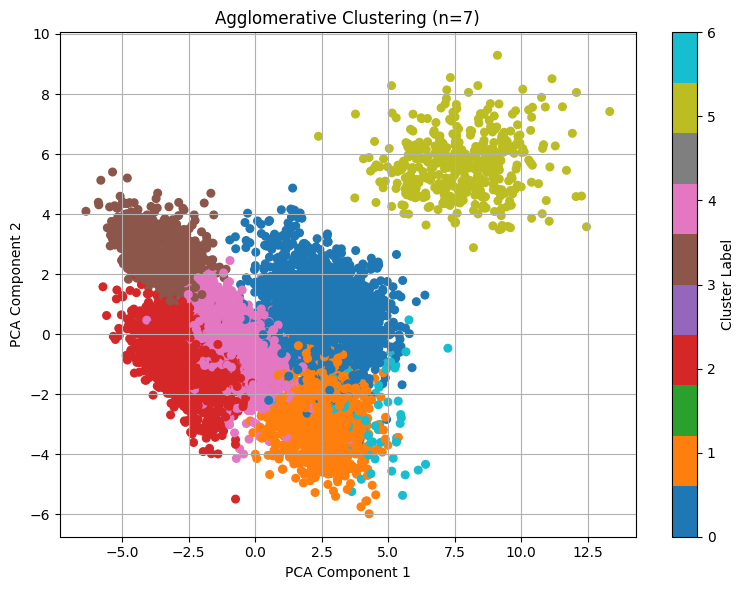

In [13]:
# Part three: Clustering
# Hierarchical Clustering   
# Visualize the Agglomerative clustering results 

custom_colors = ['blue', 'green', 'purple', 'yellow', 'yellow', 'orange', 'red']
visualize_clusters(X_train_scaled, hierarchical_labels, title="Agglomerative Clustering (n=7)")


In [14]:
# Part three: Clustering
# Hierarchical Clustering
# Apply divisive clustering and demonstrate the results
from sklearn.cluster import KMeans
import numpy as np

def apply_divisive_clustering(X, n_clusters=7):
    print("Apply Divisive Clustering ...")

    clusters = {0: X}
    labels = np.zeros(len(X), dtype=int)
    current_label = 1

    while len(clusters) < n_clusters:
        largest_cluster = max(clusters.items(), key=lambda x: len(x[1]))[0]
        data_to_split = clusters.pop(largest_cluster)

        kmeans = KMeans(n_clusters=2, random_state=0).fit(data_to_split)
        split_labels = kmeans.labels_

        original_indices = np.where(labels == largest_cluster)[0]

        for i in [0, 1]:
            new_cluster_data = data_to_split[split_labels == i]
            new_cluster_indices = original_indices[split_labels == i]
            clusters[current_label] = new_cluster_data
            labels[new_cluster_indices] = current_label
            current_label += 1

    return labels



print(" Divisive Cluster  ")
divisive_labels = apply_divisive_clustering(X_train_scaled, n_clusters=7)
evaluate_clustering(X_train_scaled, y_train, divisive_labels)


 Divisive Cluster  
Apply Divisive Clustering ...
 external metric:
  ARI  (Adjusted Rand Index):     0.5836
  NMI  (Normalized Mutual Info):  0.6656
  FMI  (Fowlkes-Mallows Index):   0.6544
  V-measure:                     0.6656
  Purity:                        0.7742

 internal metric
  Silhouette Score:               0.2572
  Calinski-Harabasz Index:        5304.43
  Davies-Bouldin Index:           1.2664
  Dunn Index:                     0.0072


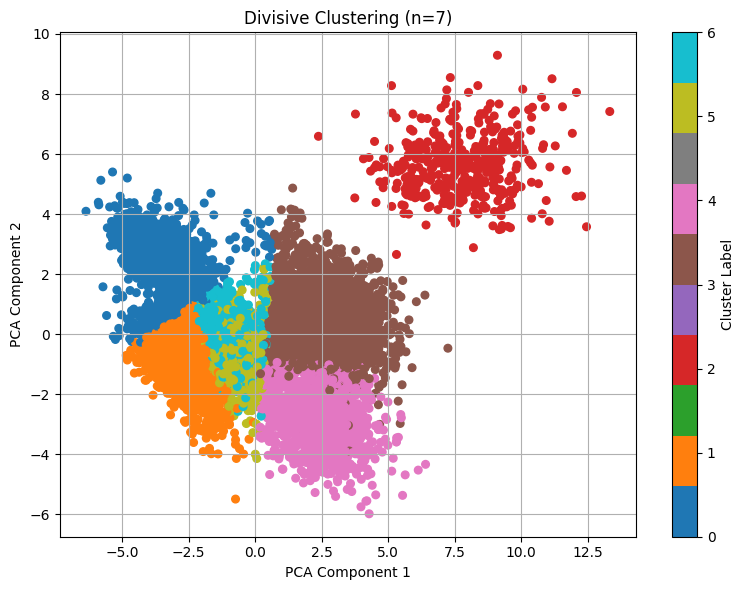

In [15]:
# Part three: Clustering
# Hierarchical Clustering
# Visual divisive clustering 


custom_colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'yellow'] 
visualize_clusters(X_train_scaled, divisive_labels, title="Divisive Clustering (n=7)")

In [16]:
# Part three: Clustering
# Density-based Clustering
# Apply DBSCAN clustering and demonstrate the results

from sklearn.cluster import DBSCAN

def apply_dbscan_clustering(X, eps=0.5, min_samples=85):
    print("Applying DBSCAN Clustering...")
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(X)
    return cluster_labels




print(" DBSCAN clustering outcome:")
dbscan_labels = apply_dbscan_clustering(X_train_scaled, eps=0.3, min_samples=5)
evaluate_clustering(X_train_scaled, y_train, dbscan_labels)


 DBSCAN clustering outcome:
Applying DBSCAN Clustering...
 external metric:
  ARI  (Adjusted Rand Index):     0.0017
  NMI  (Normalized Mutual Info):  0.1368
  FMI  (Fowlkes-Mallows Index):   0.3776
  V-measure:                     0.1368
  Purity:                        0.3261

 internal metric
  Silhouette Score:               -0.5162
  Calinski-Harabasz Index:        14.25
  Davies-Bouldin Index:           1.5273
  Dunn Index:                     0.0045


In [17]:
# Part three: Clustering
# Density-based Clustering
# Apply HDBSCAN clustering and demonstrate the results
import hdbscan

def apply_hdbscan_clustering(X, min_cluster_size=5):
    print("Applying HDBSCAN Clustering...")
    hdb = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
    cluster_labels = hdb.fit_predict(X)
    return cluster_labels


print(" HDBSCAN clustering outcome:")
hdbscan_labels = apply_hdbscan_clustering(X_train_scaled, min_cluster_size=5)
evaluate_clustering(X_train_scaled, y_train, hdbscan_labels)


 HDBSCAN clustering outcome:
Applying HDBSCAN Clustering...


c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 external metric:
  ARI  (Adjusted Rand Index):     0.0385
  NMI  (Normalized Mutual Info):  0.1386
  FMI  (Fowlkes-Mallows Index):   0.4172
  V-measure:                     0.1386
  Purity:                        0.3043

 internal metric
  Silhouette Score:               0.0599
  Calinski-Harabasz Index:        819.14
  Davies-Bouldin Index:           1.5074
  Dunn Index:                     0.0177


In [18]:
# Part three: Clustering
# Density-based Clustering
# Apply OPTICS clustering and demonstrate the results
from sklearn.cluster import OPTICS

def apply_optics_clustering(X, min_samples=5, xi=0.03, min_cluster_size=0.05):
    print("Applying OPTICS Clustering...")
    optics = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=min_cluster_size)
    cluster_labels = optics.fit_predict(X)
    return cluster_labels


print("OPTICS Clustering outcome:")
optics_labels = apply_optics_clustering(X_train_scaled, min_samples=5)
evaluate_clustering(X_train_scaled, y_train, optics_labels)


OPTICS Clustering outcome:
Applying OPTICS Clustering...
 external metric:
  ARI  (Adjusted Rand Index):     0.0005
  NMI  (Normalized Mutual Info):  0.0016
  FMI  (Fowlkes-Mallows Index):   0.4162
  V-measure:                     0.0016
  Purity:                        0.2646

 internal metric
  Silhouette Score:               0.5349
  Calinski-Harabasz Index:        96.01
  Davies-Bouldin Index:           1.4662
  Dunn Index:                     0.0511


In [19]:
# Part three: Clustering
# Model-based Clustering - Gaussian Mixture Model (GMM)
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
import numpy as np

# GMM
def apply_gmm_clustering(X, n_components=3, covariance_type='full'):
    print("Applying GMM clustering...")
    gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    gmm_labels = gmm.fit_predict(X)
    return gmm_labels


print("GMM clustering outcome:")
gmm_labels = apply_gmm_clustering(X_train_scaled, n_components=3)
evaluate_clustering(X_train_scaled, y_train, gmm_labels) 


GMM clustering outcome:
Applying GMM clustering...
 external metric:
  ARI  (Adjusted Rand Index):     0.3110
  NMI  (Normalized Mutual Info):  0.5061
  FMI  (Fowlkes-Mallows Index):   0.5502
  V-measure:                     0.5061
  Purity:                        0.4380

 internal metric
  Silhouette Score:               0.4039
  Calinski-Harabasz Index:        6879.97
  Davies-Bouldin Index:           0.9084
  Dunn Index:                     0.0091


In [20]:
# Part three: Clustering
# Model-based Clustering - Hidden Markov Model (HMM)
from hmmlearn import hmm
import numpy as np

def apply_hmm_clustering(X, n_components=3):
    print("Applying HMM clustering...")
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="full")
    # 假设 X 为 2D 数据，适合用来表示多个时间步长的序列
    model.fit(X)  # 训练模型
    hmm_labels = model.predict(X)  # 获取预测标签
    return hmm_labels

# 训练 HMM 模型
print("HMM clustering outcome:")
hmm_labels = apply_hmm_clustering(X_train_scaled, n_components=3)
evaluate_clustering(X_train_scaled, y_train, hmm_labels)  


HMM clustering outcome:
Applying HMM clustering...
 external metric:
  ARI  (Adjusted Rand Index):     0.3034
  NMI  (Normalized Mutual Info):  0.4917
  FMI  (Fowlkes-Mallows Index):   0.5424
  V-measure:                     0.4917
  Purity:                        0.4358

 internal metric
  Silhouette Score:               0.4007
  Calinski-Harabasz Index:        6865.47
  Davies-Bouldin Index:           0.9118
  Dunn Index:                     0.0091


In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.cluster import KMeans
import numpy as np


class AutoEncoder(nn.Module):
    def __init__(self, input_dim=784, hidden_dim=500, latent_dim=10):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        z = self.encoder(x)
        x_re = self.decoder(z)
        return x_re, z

def apply_dec_clustering(X, n_clusters=7, epochs=30):
    print("Applying DEC (Deep Embedded Clustering)...")

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    X_tensor = torch.tensor(X, dtype=torch.float32).to(device)

    model = AutoEncoder(input_dim=X.shape[1], latent_dim=n_clusters).to(device)
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    loss_fn = nn.MSELoss()

# train the AutoEncoder
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        x_re, _ = model(X_tensor)
        loss = loss_fn(x_re, X_tensor)
        loss.backward()
        optimizer.step()

# Extract the latent representation
    with torch.no_grad():
        _, embedded = model(X_tensor)
        embedded_np = embedded.cpu().numpy()

# Apply KMeans clustering as a post-processing step
    kmeans = KMeans(n_clusters=n_clusters, n_init=20)
    cluster_labels = kmeans.fit_predict(embedded_np)

    return cluster_labels



print("DEC clustering outcome:")
dec_labels = apply_dec_clustering(X_train_scaled, n_clusters=7, epochs=50)

evaluate_clustering(X_train_scaled, y_train, dec_labels)


DEC clustering outcome:
Applying DEC (Deep Embedded Clustering)...
 external metric:
  ARI  (Adjusted Rand Index):     0.5913
  NMI  (Normalized Mutual Info):  0.6658
  FMI  (Fowlkes-Mallows Index):   0.6617
  V-measure:                     0.6658
  Purity:                        0.7964

 internal metric
  Silhouette Score:               0.2476
  Calinski-Harabasz Index:        5377.86
  Davies-Bouldin Index:           1.4512
  Dunn Index:                     0.0085


In [22]:
# Part three: Clustering
# Model-based Clustering - Deep Embedded Clustering (DEC)
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import ParameterGrid
class AutoEncoder(nn.Module):
    def __init__(self, input_dim=784, hidden_dim=500, latent_dim=10):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        z = self.encoder(x)
        x_re = self.decoder(z)
        return x_re, z
    
def train_dec(X, y_true, params):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
    
    # Initialize the AutoEncoder model
    model = AutoEncoder(
        input_dim=X.shape[1],
        hidden_dim=params['hidden_dim'],
        latent_dim=params['latent_dim']
    ).to(device)
    
    optimizer = optim.Adam(model.parameters(), lr=params['lr'])
    loss_fn = nn.MSELoss()

    # Train the AutoEncoder
    model.train()
    for epoch in range(params['epochs']):
        optimizer.zero_grad()
        x_re, _ = model(X_tensor)
        loss = loss_fn(x_re, X_tensor)
        loss.backward()
        optimizer.step()

    # Extract the latent representation
    with torch.no_grad():
        _, embedded = model(X_tensor)
        embedded_np = embedded.cpu().numpy()
    
    kmeans = KMeans(n_clusters=params['n_clusters'], n_init=20)
    cluster_labels = kmeans.fit_predict(embedded_np)
    
    # calculate the Adjusted Rand Index (ARI)
    ari = adjusted_rand_score(y_true, cluster_labels)
    return ari

# Grid Search for Hyperparameters
param_grid = {
    'latent_dim': [10, 20, 30],     
    'hidden_dim': [256, 512],   
    'n_clusters': [7],        
    'lr': [1e-4, 1e-3, 1e-2],      
    'epochs': [30, 50]         
}

# grid search
best_ari = -1
best_params = None

for params in ParameterGrid(param_grid):
    print(f"Testing params: {params}")
    try:
        ari = train_dec(X_train_scaled, y_train, params)
        print(f"ARI: {ari:.4f}")
        if ari > best_ari:
            best_ari = ari
            best_params = params
    except Exception as e:
        print(f"Failed with {params}: {str(e)}")

print("\n Best Parameters:")
print(best_params)
print(f"Best ARI: {best_ari:.4f}")

Testing params: {'epochs': 30, 'hidden_dim': 256, 'latent_dim': 10, 'lr': 0.0001, 'n_clusters': 7}
ARI: 0.5154
Testing params: {'epochs': 30, 'hidden_dim': 256, 'latent_dim': 10, 'lr': 0.001, 'n_clusters': 7}
ARI: 0.4006
Testing params: {'epochs': 30, 'hidden_dim': 256, 'latent_dim': 10, 'lr': 0.01, 'n_clusters': 7}
ARI: 0.6691
Testing params: {'epochs': 30, 'hidden_dim': 256, 'latent_dim': 20, 'lr': 0.0001, 'n_clusters': 7}
ARI: 0.5796
Testing params: {'epochs': 30, 'hidden_dim': 256, 'latent_dim': 20, 'lr': 0.001, 'n_clusters': 7}
ARI: 0.5048
Testing params: {'epochs': 30, 'hidden_dim': 256, 'latent_dim': 20, 'lr': 0.01, 'n_clusters': 7}
ARI: 0.6108
Testing params: {'epochs': 30, 'hidden_dim': 256, 'latent_dim': 30, 'lr': 0.0001, 'n_clusters': 7}
ARI: 0.6089
Testing params: {'epochs': 30, 'hidden_dim': 256, 'latent_dim': 30, 'lr': 0.001, 'n_clusters': 7}
ARI: 0.5870
Testing params: {'epochs': 30, 'hidden_dim': 256, 'latent_dim': 30, 'lr': 0.01, 'n_clusters': 7}
ARI: 0.6079
Testing pa

In [23]:
class SimpleMLP(nn.Module):

    def __init__(self, input_dim=784, feature_dim=256, hidden_dim=512):
        super().__init__()
        self.feature_extractor = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(inplace=True),  
            nn.Dropout(p=0.1),      
            nn.Linear(hidden_dim, feature_dim)
        )
        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_out')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def forward(self, x):
        return self.feature_extractor(x)


def deep_cluster_fit(X, n_clusters=7, max_epochs=50, learning_rate=1e-3, verbose=True):

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    if verbose:
        print(f" Using device: {device}")
    X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
    model = SimpleMLP(input_dim=X.shape[1]).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    

    model.train()
    for epoch in range(1, max_epochs + 1):
        with torch.no_grad():
            features = model(X_tensor).cpu().numpy()
        # KMeans clustering
        kmeans = KMeans(n_clusters=n_clusters, n_init=15)
        cluster_labels = kmeans.fit_predict(features)
        target = torch.tensor(cluster_labels, dtype=torch.long).to(device)
        outputs = model(X_tensor)
        loss = nn.CrossEntropyLoss()(outputs, target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if verbose and epoch % 10 == 0:
            print(f"Epoch {epoch}/{max_epochs} - Loss: {loss.item():.4f}")

    with torch.no_grad():
        final_features = model(X_tensor).cpu().numpy()
        final_kmeans = KMeans(n_clusters=n_clusters, n_init=20)
        final_labels = final_kmeans.fit_predict(final_features)
    
    return final_labels


# evaluation
print("\nDeepCluster clustering:")
cluster_results = deep_cluster_fit(
    X_train_scaled,
    n_clusters=7,
    max_epochs=50,
    learning_rate=0.001,
    verbose=True
)

print("\nclustering outcome:")

evaluate_clustering(X_train_scaled, y_train, cluster_results)


DeepCluster clustering:
 Using device: cpu
Epoch 10/50 - Loss: 4.6485
Epoch 20/50 - Loss: 3.8490
Epoch 30/50 - Loss: 3.0023
Epoch 40/50 - Loss: 2.7640
Epoch 50/50 - Loss: 2.3227

clustering outcome:
 external metric:
  ARI  (Adjusted Rand Index):     0.2338
  NMI  (Normalized Mutual Info):  0.3493
  FMI  (Fowlkes-Mallows Index):   0.3715
  V-measure:                     0.3493
  Purity:                        0.5244

 internal metric
  Silhouette Score:               0.0110
  Calinski-Harabasz Index:        1198.02
  Davies-Bouldin Index:           8.4727
  Dunn Index:                     0.0000


In [25]:
# Part four: Prediction: Training and Testing
# Linear-based Classifier
# Apply Logistic Regression and demonstrate the results
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(
    penalty=None,            
    solver='saga',           
    max_iter=1000,
    random_state=42
)

# Fit the model
log_reg.fit(X_train_scaled, y_train)

# Predict
y_pred_train = log_reg.predict(X_train_scaled)
y_pred_log = log_reg.predict(X_test_scaled)

print("Logistic Regression Training Accuracy: {:.4f}".format(accuracy_score(y_train, y_pred_train)))
print("\nLogistic Regression Classification Report:")
print(classification_report(y_train, y_pred_train))

# Evaluation
print(f"Logistic Regression Testing Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))


Logistic Regression Training Accuracy: 0.9247

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1061
           1       1.00      1.00      1.00       405
           2       0.93      0.94      0.94      1313
           3       0.92      0.92      0.92      2875
           4       0.96      0.95      0.95      1520
           5       0.95      0.95      0.95      1614
           6       0.86      0.88      0.87      2100

    accuracy                           0.92     10888
   macro avg       0.94      0.94      0.94     10888
weighted avg       0.93      0.92      0.92     10888

Logistic Regression Testing Accuracy: 0.9251

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       261
           1       1.00      1.00      1.00       117
           2       0.93      0.94      0.94       317
       

c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [26]:
# Part four: Prediction: Training and Testing
# Linear-based Classifier
# Logistic Regression with Ridge Regularization (L2)
log_reg_ridge = LogisticRegression(
    penalty='l2',              
    C=1.0,                   
    solver='saga',           
    max_iter=1000,
    random_state=42
)


log_reg_ridge.fit(X_train_scaled, y_train)

y_pred_train_ridge = log_reg_ridge.predict(X_train_scaled)
y_pred_ridge = log_reg_ridge.predict(X_test_scaled)

print("Logistic Regression (Ridge) Training Accuracy: {:.4f}".format(accuracy_score(y_train, y_pred_train_ridge)))
print("\nLogistic Regression (Ridge) Classification Report:")
print(classification_report(y_train, y_pred_train_ridge))

print(f"Logistic Regression (Ridge) Testing Accuracy: {accuracy_score(y_test, y_pred_ridge):.4f}")
print("\nLogistic Regression (Ridge) Classification Report:")
print(classification_report(y_test, y_pred_ridge))


Logistic Regression (Ridge) Training Accuracy: 0.9247

Logistic Regression (Ridge) Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1061
           1       1.00      1.00      1.00       405
           2       0.93      0.95      0.94      1313
           3       0.92      0.92      0.92      2875
           4       0.96      0.95      0.95      1520
           5       0.95      0.95      0.95      1614
           6       0.86      0.87      0.87      2100

    accuracy                           0.92     10888
   macro avg       0.94      0.94      0.94     10888
weighted avg       0.93      0.92      0.92     10888

Logistic Regression (Ridge) Testing Accuracy: 0.9266

Logistic Regression (Ridge) Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       261
           1       1.00      1.00      1.00       117
           2       0.95      

c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [28]:
# Part four: Prediction: Training and Testing
# Tree-based Classifier
# Apply Decision Tree Classifier and demonstrate the results
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


tree = DecisionTreeClassifier(
    criterion='entropy',       
    max_depth= 8,   
    min_samples_split=10,  
    min_samples_leaf=2,     
    random_state=42
)

# X with noise perform best
# tree.fit(X_train_scaled, y_train)
tree.fit(X_train_scaled, y_train)
# tree.fit(X_train_no_outliers, y_train_no_outliers)



y_pred = tree.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9137

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       261
           1       1.00      1.00      1.00       117
           2       0.90      0.95      0.92       317
           3       0.89      0.91      0.90       671
           4       0.97      0.95      0.96       408
           5       0.95      0.93      0.94       413
           6       0.87      0.86      0.86       536

    accuracy                           0.91      2723
   macro avg       0.93      0.92      0.92      2723
weighted avg       0.91      0.91      0.91      2723



In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 7, 8, 9, 10],
    'min_samples_split': [ 2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# initialize the Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)

# grid search
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# output the best parameters
print("Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [31]:
# Part four: Prediction: Training and Testing
# Tree-based Classifier
# Apply Extra Trees Classifier and demonstrate the results
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Initialize ExtraTreesClassifier
extra_tree = ExtraTreesClassifier(
    n_estimators=100,          # number of trees
    criterion='entropy',       # the function to measure the quality of a split
    max_depth=8,             
    min_samples_split=10,      # the minimum number of samples required to split an internal node
    min_samples_leaf=2,        # the minimum number of samples required to be at a leaf node
    random_state=42
)

extra_tree.fit(X_train_scaled, y_train)
#extra_tree.fit(X_train_noisy, y_train)


y_pred_extra = extra_tree.predict(X_test_scaled)


print(f"Extra Trees Accuracy: {accuracy_score(y_test, y_pred_extra):.4f}")

print("\nExtra Trees Classification Report:")
print(classification_report(y_test, y_pred_extra))


Extra Trees Accuracy: 0.9071

Extra Trees Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       261
           1       1.00      1.00      1.00       117
           2       0.87      0.91      0.89       317
           3       0.90      0.91      0.90       671
           4       0.97      0.95      0.96       408
           5       0.96      0.94      0.95       413
           6       0.84      0.88      0.86       536

    accuracy                           0.91      2723
   macro avg       0.92      0.91      0.92      2723
weighted avg       0.91      0.91      0.91      2723



In [32]:
# Part four: Prediction: Training and Testing
# SVM Classifier
# Apply Support Vector Machine (SVM) and demonstrate the results
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_clf = SVC(
    kernel='linear', 
    C=1.0,             
    gamma='scale',    
    random_state=42
)


svm_clf.fit(X_train_scaled, y_train)

y_pred_train_svm = svm_clf.predict(X_train_scaled)
y_pred_svm = svm_clf.predict(X_test_scaled)

print("SVM Training Accuracy: {:.4f}".format(accuracy_score(y_train, y_pred_train_svm)))
print("\nSVM Classification Report:")
print(classification_report(y_train, y_pred_train_svm))

print(f"SVM Testing Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Training Accuracy: 0.9277

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1061
           1       1.00      1.00      1.00       405
           2       0.94      0.95      0.94      1313
           3       0.92      0.93      0.92      2875
           4       0.96      0.95      0.95      1520
           5       0.95      0.95      0.95      1614
           6       0.87      0.87      0.87      2100

    accuracy                           0.93     10888
   macro avg       0.94      0.94      0.94     10888
weighted avg       0.93      0.93      0.93     10888

SVM Testing Accuracy: 0.9284

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       261
           1       1.00      1.00      1.00       117
           2       0.94      0.94      0.94       317
           3       0.91      0.91      0.91       671
           4     

SVM Training Accuracy: 0.9318

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1061
           1       1.00      1.00      1.00       405
           2       0.95      0.96      0.95      1313
           3       0.92      0.93      0.92      2875
           4       0.97      0.96      0.96      1520
           5       0.95      0.95      0.95      1614
           6       0.87      0.88      0.88      2100

    accuracy                           0.93     10888
   macro avg       0.95      0.94      0.94     10888
weighted avg       0.93      0.93      0.93     10888

SVM Accuracy: 0.9339

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       261
           1       1.00      1.00      1.00       117
           2       0.94      0.95      0.94       317
           3       0.91      0.93      0.92       671
           4       0.98  

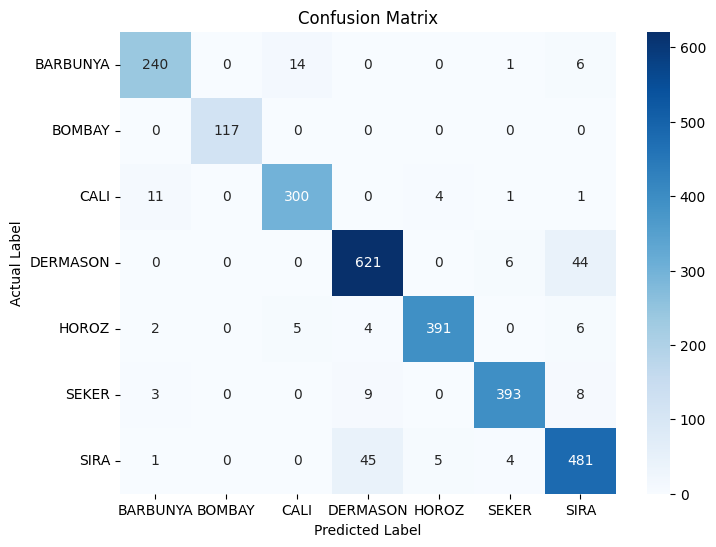

In [34]:
# Part four: Prediction: Training and Testing
# SVM Classifier
# Apply kernal Support Vector Machine (SVM) and demonstrate the results
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

svm_clf = SVC(
    kernel='rbf',         
    C=1.0,               
    gamma='scale',        
    random_state=42
)

svm_clf.fit(X_train_scaled, y_train)

y_pred_train_svm = svm_clf.predict(X_train_scaled)
y_pred_svm = svm_clf.predict(X_test_scaled)

print(f"SVM Training Accuracy: {accuracy_score(y_train, y_pred_train_svm):.4f}")
print("\nSVM Classification Report:")
print(classification_report(y_train, y_pred_train_svm))

print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()


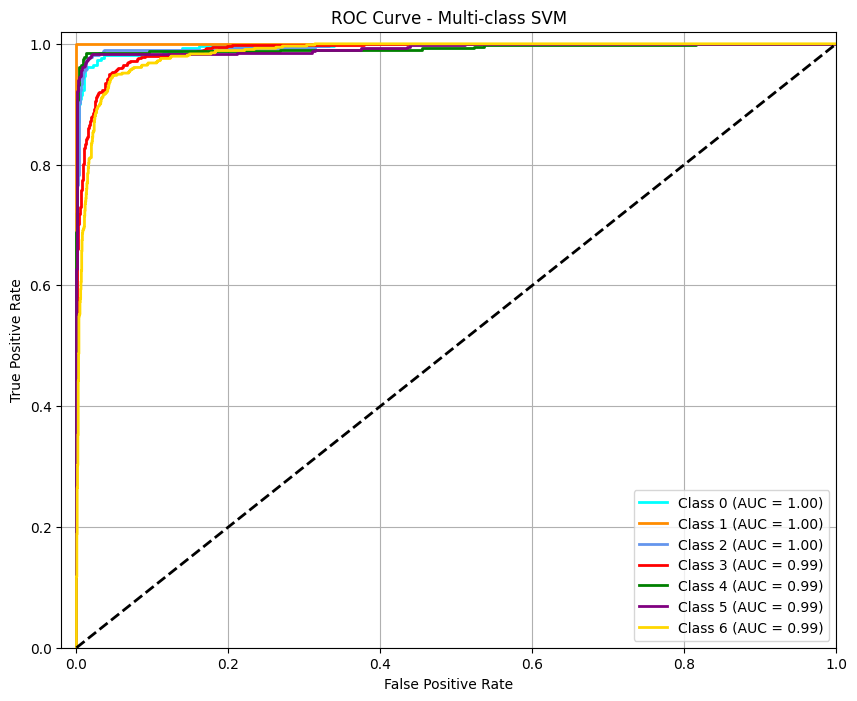

In [35]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np


n_classes = 7

# Binarize the output label
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))
y_train_binarized = label_binarize(y_train, classes=np.arange(n_classes))

# use OneVsRestClassifier for multi-class SVM
classifier = OneVsRestClassifier(SVC(kernel='rbf', probability=True, random_state=42))
classifier.fit(X_train_scaled, y_train_binarized)

y_score = classifier.predict_proba(X_test_scaled)

#calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# plot ROC curve for each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'gold'])

plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-class SVM')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [36]:
# Part four: Prediction: Training and Testing
# Apply K-Nearest Neighbors (KNN) and demonstrate the results
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_clf = KNeighborsClassifier(
    n_neighbors=5,        
    weights='uniform',    # or 'distance'
    metric='minkowski',   
)


knn_clf.fit(X_train_scaled, y_train)

y_pred_train_knn = knn_clf.predict(X_train_scaled)
y_pred_knn = knn_clf.predict(X_test_scaled)


print(f"KNN Training Accuracy: {accuracy_score(y_train, y_pred_train_knn):.4f}")
print("\nKNN Classification Report:")
print(classification_report(y_train, y_pred_train_knn))


print(f"KNN Testing Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))


KNN Training Accuracy: 0.9430

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1061
           1       1.00      1.00      1.00       405
           2       0.95      0.96      0.96      1313
           3       0.93      0.94      0.94      2875
           4       0.97      0.95      0.96      1520
           5       0.96      0.96      0.96      1614
           6       0.90      0.90      0.90      2100

    accuracy                           0.94     10888
   macro avg       0.95      0.95      0.95     10888
weighted avg       0.94      0.94      0.94     10888

KNN Testing Accuracy: 0.9232

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       261
           1       1.00      1.00      1.00       117
           2       0.92      0.96      0.94       317
           3       0.89      0.91      0.90       671
           4     

In [37]:
# Part four: Prediction: Training and Testing
# Neural Network Classifier - Multilayer Perceptron (MLP)
# Comment: Performance is not as good as expected, not outstanding at all
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# construct the multi-layer perceptron model
# alpha: regularization parameter, solver: optimization algorithm, tol: stop condition
mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, alpha = 1e-4,
                        solver='lbfgs', tol=1e-6, random_state=42)

mlp_clf.fit(X_train_scaled, y_train)

y_train_pred = mlp_clf.predict(X_train_scaled)
y_test_pred = mlp_clf.predict(X_test_scaled)

accuracy_train = accuracy_score(y_train_pred, y_train)
accuracy_test = accuracy_score(y_test_pred, y_test)

print(f"Training accuracy: {accuracy_train:.4f}")
print("\nMLP Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\n")
print(f"Testing accuracy: {accuracy_test:.4f}")
print("\nMLP Classification Report:")
print(classification_report(y_test, y_test_pred))

Training accuracy: 0.9407

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1061
           1       1.00      1.00      1.00       405
           2       0.96      0.96      0.96      1313
           3       0.92      0.94      0.93      2875
           4       0.97      0.96      0.96      1520
           5       0.96      0.96      0.96      1614
           6       0.89      0.89      0.89      2100

    accuracy                           0.94     10888
   macro avg       0.95      0.95      0.95     10888
weighted avg       0.94      0.94      0.94     10888



Testing accuracy: 0.9313

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       261
           1       1.00      1.00      1.00       117
           2       0.94      0.95      0.95       317
           3       0.91      0.92      0.92       671
           4       0.97

c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



In [38]:
# Improvement: Feature selection: Filter method: SelectKBest, score_func=f_classif / mutual_info_classif
# f_classif is to justify some features' mean difference are obvious or not between different classes.
# f_mutual_info_classif is to justify the features' mutual information with the target label.
# We split the training data into train/validation set for k selection, and then use the best k=12 to fit on the full training set. 

# Comment: Performance is even lower than the original one that do not select the features.
# The reason could be that this feature selection method might drop features that are only useful together with others.

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split training data into train/validation for k selection
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

k_accuracy_1 = []
k_accuracy_2 = []
for k in range(5, 17):
    selector1 = SelectKBest(score_func=f_classif, k=k)
    X_new_train_sub = selector1.fit_transform(X_train_sub, y_train_sub)
    X_new_val = selector1.transform(X_val)

    selector2 = SelectKBest(score_func=mutual_info_classif, k=k)
    X_new_train_sub_2 = selector2.fit_transform(X_train_sub, y_train_sub)
    X_new_val_2 = selector2.transform(X_val)

    mlp_clf1 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, alpha=1e-4,
                             solver='lbfgs', tol=1e-6, random_state=42)
    mlp_clf1.fit(X_new_train_sub, y_train_sub)
    y_val_pred = mlp_clf1.predict(X_new_val)
    accuracy_val_1 = accuracy_score(y_val, y_val_pred)
    k_accuracy_1.append(accuracy_val_1)

    mlp_clf2 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, alpha=1e-4,
                             solver='lbfgs', tol=1e-6, random_state=42)
    mlp_clf2.fit(X_new_train_sub_2, y_train_sub)
    y_val_pred_2 = mlp_clf2.predict(X_new_val_2)
    accuracy_val_2 = accuracy_score(y_val, y_val_pred_2)
    k_accuracy_2.append(accuracy_val_2)

# Get best k for both methods
best_k_1 = k_accuracy_1.index(max(k_accuracy_1)) + 1
best_k_2 = k_accuracy_2.index(max(k_accuracy_2)) + 1

print(f"Best k for f_classif: {best_k_1}")
print(f"Best k for mutual_info_classif: {best_k_2}")

# Use best k to fit on full training set and evaluate on test set
selector1 = SelectKBest(score_func=f_classif, k=best_k_1)
X_new_train_scaled = selector1.fit_transform(X_train_scaled, y_train)
X_new_test_scaled = selector1.transform(X_test_scaled)

mlp_clf1 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, alpha=1e-4,
                         solver='lbfgs', tol=1e-6, random_state=42)
mlp_clf1.fit(X_new_train_scaled, y_train)
y_train_pred = mlp_clf1.predict(X_new_train_scaled)
y_test_pred = mlp_clf1.predict(X_new_test_scaled)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {accuracy_train:.4f}")
print("\nMLP Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\n")
print(f"Testing accuracy: {accuracy_test:.4f}")
print("\nMLP Classification Report:")
print(classification_report(y_test, y_test_pred))


selector2 = SelectKBest(score_func=mutual_info_classif, k=best_k_2)
X_new_train_scaled_2 = selector2.fit_transform(X_train_scaled, y_train)
X_new_test_scaled_2 = selector2.transform(X_test_scaled)

mlp_clf2 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, alpha=1e-4,
                            solver='lbfgs', tol=1e-6, random_state=42)
mlp_clf2.fit(X_new_train_scaled_2, y_train)

y_train_pred_2 = mlp_clf2.predict(X_new_train_scaled_2)
y_test_pred_2 = mlp_clf2.predict(X_new_test_scaled_2)

accuracy_train_2 = accuracy_score(y_train, y_train_pred_2)
accuracy_test_2 = accuracy_score(y_test, y_test_pred_2)

print(f"Training accuracy: {accuracy_train_2:.4f}")
print("\nMLP Classification Report:")
print(classification_report(y_train, y_train_pred_2))

print("\n")
print(f"Testing accuracy: {accuracy_test_2:.4f}")
print("\nMLP Classification Report:")
print(classification_report(y_test, y_test_pred_2))



c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
  

Best k for f_classif: 12
Best k for mutual_info_classif: 12


c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Training accuracy: 0.9157

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1061
           1       1.00      1.00      1.00       405
           2       0.92      0.94      0.93      1313
           3       0.91      0.92      0.92      2875
           4       0.95      0.93      0.94      1520
           5       0.94      0.94      0.94      1614
           6       0.84      0.86      0.85      2100

    accuracy                           0.92     10888
   macro avg       0.93      0.93      0.93     10888
weighted avg       0.92      0.92      0.92     10888



Testing accuracy: 0.9207

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       261
           1       1.00      1.00      1.00       117
           2       0.92      0.95      0.94       317
           3       0.90      0.91      0.91       671
           4       0.97

c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



In [39]:
# However, if we use k=15 to fit on the entire training set, we could get a better result.
selector1 = SelectKBest(score_func=f_classif, k=15)
X_new_train_scaled = selector1.fit_transform(X_train_scaled, y_train)
X_new_test_scaled = selector1.transform(X_test_scaled)

mlp_clf1 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, alpha=1e-4,
                         solver='lbfgs', tol=1e-6, random_state=42)
mlp_clf1.fit(X_new_train_scaled, y_train)

y_train_pred = mlp_clf1.predict(X_new_train_scaled)
y_test_pred = mlp_clf1.predict(X_new_test_scaled)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {accuracy_train:.4f}")
print("\nMLP Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\n")
print(f"Testing accuracy: {accuracy_test:.4f}")
print("\nMLP Classification Report:")
print(classification_report(y_test, y_test_pred))


selector2 = SelectKBest(score_func=mutual_info_classif, k=15)
X_new_train_scaled_2 = selector2.fit_transform(X_train_scaled, y_train)
X_new_test_scaled_2 = selector2.transform(X_test_scaled)

mlp_clf2 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, alpha=1e-4,
                            solver='lbfgs', tol=1e-6, random_state=42)
mlp_clf2.fit(X_new_train_scaled_2, y_train)

y_train_pred_2 = mlp_clf2.predict(X_new_train_scaled_2)
y_test_pred_2 = mlp_clf2.predict(X_new_test_scaled_2)

accuracy_train_2 = accuracy_score(y_train, y_train_pred_2)
accuracy_test_2 = accuracy_score(y_test, y_test_pred_2)

print(f"Training accuracy: {accuracy_train_2:.4f}")
print("\nMLP Classification Report:")
print(classification_report(y_train, y_train_pred_2))

print("\n")
print(f"Testing accuracy: {accuracy_test_2:.4f}")
print("\nMLP Classification Report:")
print(classification_report(y_test, y_test_pred_2))

c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Training accuracy: 0.9358

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1061
           1       1.00      1.00      1.00       405
           2       0.95      0.95      0.95      1313
           3       0.92      0.94      0.93      2875
           4       0.96      0.95      0.96      1520
           5       0.96      0.96      0.96      1614
           6       0.89      0.88      0.88      2100

    accuracy                           0.94     10888
   macro avg       0.95      0.95      0.95     10888
weighted avg       0.94      0.94      0.94     10888



Testing accuracy: 0.9335

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       261
           1       1.00      1.00      1.00       117
           2       0.95      0.95      0.95       317
           3       0.91      0.93      0.92       671
           4       0.97

c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
  

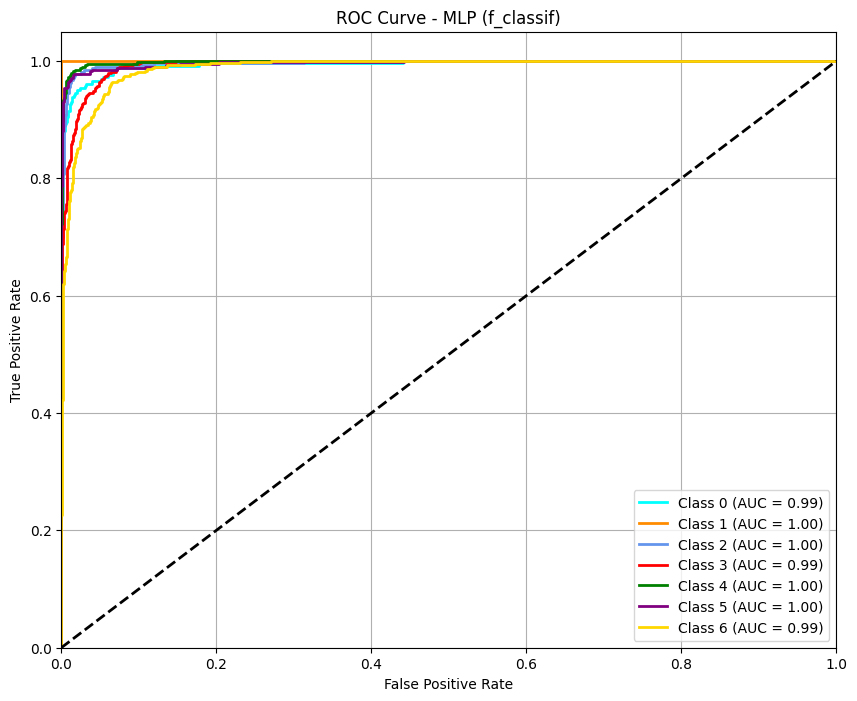

In [40]:

n_classes = 7

# Binarize the output label
y_train_bin = label_binarize(y_train, classes=np.arange(n_classes))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# use OneVsRestClassifier for multi-class SVM
classifier = OneVsRestClassifier(SVC(kernel='rbf', probability=True, random_state=42))
classifier.fit(X_train_scaled, y_train_binarized)

# Feature selection
# Use SelectKBest to select the top k features
selector1 = SelectKBest(score_func=f_classif, k=15)
X_new_train_scaled = selector1.fit_transform(X_train_scaled, y_train)
X_new_test_scaled = selector1.transform(X_test_scaled)

#train the MLP model using OneVsRestClassifier
mlp_ovr1 = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100,
                                             alpha=1e-4, solver='lbfgs', tol=1e-6,
                                             random_state=42))
mlp_ovr1.fit(X_new_train_scaled, y_train_bin)

y_score1 = mlp_ovr1.predict_proba(X_new_test_scaled)

# calculate ROC curve and AUC for each class
fpr1, tpr1, roc_auc1 = {}, {}, {}
for i in range(n_classes):
    fpr1[i], tpr1[i], _ = roc_curve(y_test_bin[:, i], y_score1[:, i])
    roc_auc1[i] = auc(fpr1[i], tpr1[i])

# draw ROC curve for each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'gold'])
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr1[i], tpr1[i], color=color, lw=2,
             label=f"Class {i} (AUC = {roc_auc1[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP (f_classif)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [41]:
# # Improvement: Feature selection: Dimensionality Reduction: PCA
# Comment: Performance is lower that the original one that do not select the features...
# Still for reducing the linearity of the data
# But the features might not linear to each other, so PCA might not be the best choice
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

mlp_clf_pca = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, alpha = 1e-4,
                        solver='lbfgs', tol=1e-6, random_state=42)
mlp_clf_pca.fit(X_train_pca, y_train)              

y_train_pred = mlp_clf_pca.predict(X_train_pca)
y_test_pred = mlp_clf_pca.predict(X_test_pca)  

accuracy_train = accuracy_score(y_train_pred, y_train)
accuracy_test = accuracy_score(y_test_pred, y_test)

print(f"Training accuracy: {accuracy_train:.4f}")
print("\nMLP Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\n")
print(f"Testing accuracy: {accuracy_test:.4f}")
print("\nMLP Classification Report:")
print(classification_report(y_test, y_test_pred))


Training accuracy: 0.9368

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1061
           1       1.00      1.00      1.00       405
           2       0.95      0.95      0.95      1313
           3       0.92      0.93      0.93      2875
           4       0.97      0.96      0.96      1520
           5       0.96      0.96      0.96      1614
           6       0.88      0.89      0.89      2100

    accuracy                           0.94     10888
   macro avg       0.95      0.95      0.95     10888
weighted avg       0.94      0.94      0.94     10888



Testing accuracy: 0.9291

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       261
           1       1.00      1.00      1.00       117
           2       0.95      0.94      0.94       317
           3       0.91      0.92      0.92       671
           4       0.97

c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



In [42]:
# Improvement: Feature selection: Based on the first layer weights of MLP
# Comment: Performance is higher than MLP without feature selection. 
# We split the original training set into training and validation set. And perform iteration to get the best-top-k feature.
# The results shows that the top 10 features are the best.

from sklearn.model_selection import train_test_split

# 1. get training set and validation set
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

k_accuracy = []
for k in range(1, 17):
    mlp_clf_try = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, alpha=1e-4,
                                solver='lbfgs', tol=1e-6, random_state=42)
    mlp_clf_try.fit(X_train_sub, y_train_sub)
    first_layer_weights = mlp_clf_try.coefs_[0]
    feature_importances = np.mean(np.abs(first_layer_weights), axis=1)
    top_k_indices = np.argsort(feature_importances)[-k:]
    X_train_selected = X_train_sub[:, top_k_indices]
    X_val_selected = X_val[:, top_k_indices]
    mlp_clf_selected = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, alpha=1e-4,
                                     solver='lbfgs', tol=1e-6, random_state=42)
    mlp_clf_selected.fit(X_train_selected, y_train_sub)
    y_val_pred = mlp_clf_selected.predict(X_val_selected)
    accuracy_val = accuracy_score(y_val_pred, y_val)
    k_accuracy.append(accuracy_val)

# 2. choose best k based on validation set
best_k = np.argmax(k_accuracy) + 1
print(f"Best k on validation set: {best_k}")

# 3. use best k to train on the full training set and evaluate on the test set
mlp_clf_final = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, alpha=1e-4,
                             solver='lbfgs', tol=1e-6, random_state=42)
mlp_clf_final.fit(X_train_scaled, y_train)
first_layer_weights = mlp_clf_final.coefs_[0]
feature_importances = np.mean(np.abs(first_layer_weights), axis=1)
top_k_indices = np.argsort(feature_importances)[-best_k:]
X_train_selected = X_train_scaled[:, top_k_indices]
X_test_selected = X_test_scaled[:, top_k_indices]
mlp_clf_selected = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, alpha=1e-4,
                                 solver='lbfgs', tol=1e-6, random_state=42)
mlp_clf_selected.fit(X_train_selected, y_train)
y_test_pred = mlp_clf_selected.predict(X_test_selected)
print("Test accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
  

Best k on validation set: 10


c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Test accuracy: 0.9331619537275064
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       261
           1       1.00      1.00      1.00       117
           2       0.95      0.96      0.95       317
           3       0.91      0.93      0.92       671
           4       0.98      0.95      0.96       408
           5       0.96      0.95      0.96       413
           6       0.88      0.89      0.88       536

    accuracy                           0.93      2723
   macro avg       0.95      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Test accuracy: 0.9357326478149101
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       261
           1       1.00      1.00      1.00       117
           2       0.95      0.95      0.95       317
           3       0.91      0.93      0.92       671
           4       0.97      0.95      0.96       408
           5       0.97      0.96      0.97       413
           6       0.89      0.89      0.89       536

    accuracy                           0.94      2723
   macro avg       0.95      0.94      0.95      2723
weighted avg       0.94      0.94      0.94      2723



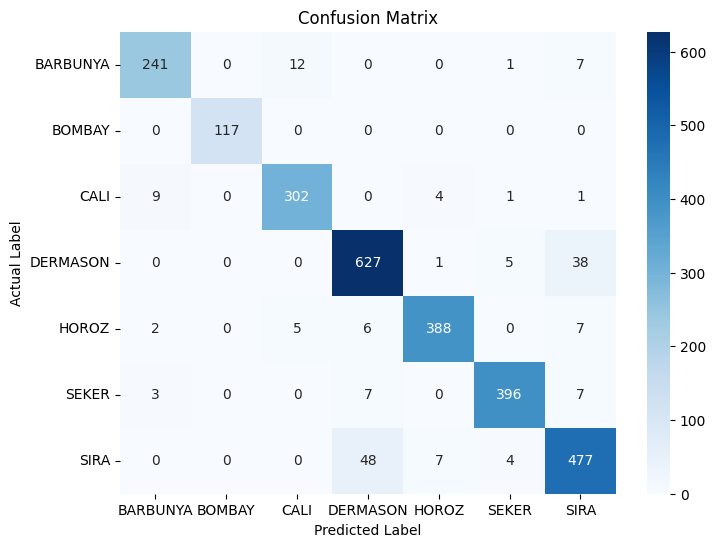

In [43]:
# However, if we directly choose k=8 and train the model on the entire training set, we could get a better performance since the training set is larger.
from sklearn.neural_network import MLPClassifier
mlp_clf_final = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, alpha=1e-4,
                             solver='lbfgs', tol=1e-6, random_state=42)
mlp_clf_final.fit(X_train_scaled, y_train)
first_layer_weights = mlp_clf_final.coefs_[0]
feature_importances = np.mean(np.abs(first_layer_weights), axis=1)
top_k_indices = np.argsort(feature_importances)[-8:]
X_train_selected = X_train_scaled[:, top_k_indices]
X_test_selected = X_test_scaled[:, top_k_indices]
mlp_clf_selected = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, alpha=1e-4,
                                 solver='lbfgs', tol=1e-6, random_state=42)
mlp_clf_selected.fit(X_train_selected, y_train)
y_test_pred = mlp_clf_selected.predict(X_test_selected)
print("Test accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [47]:
# Part four: Prediction: Training and Testing
# Neural Network Classifier - CNN
# Comment: Performance is very bad. CNN is not suitable for this dataset but for image data
# It is also because I just implement forward propagation, not including backpropagation, and it only have 1 layer, therefore it learns nothing.
# Moreover, we plan to use RNN. However we found that in researching, RNN is usually used for sequential data
# Therefore we do not implement RNN here.

# Moreover it could be overfitting since this dataset is too simple, therefore we put our effort on other models and other improving methods.


# Convert 16-features data to 4*4 matrices
X_train_reshaped = X_train_scaled.reshape(-1, 4, 4, 1) 
X_test_reshaped = X_test_scaled.reshape(-1, 4, 4, 1) 
# Reshape to (samples, height, width, channels)

class Conv2D:
    def __init__(self, num_filters, filter_size):
        self.num_filters = num_filters
        self.filter_size = filter_size
        # Initialize filters and biases
        self.filters = np.random.randn(num_filters, filter_size, filter_size) * 0.01
        self.biases = np.zeros((num_filters, 1))
        # self.cache = None, for backpropagation

    def iterate_regions(self, image):
        # Iterate over every possible position in the image
        h, w = image.shape
        for i in range(h - self.filter_size + 1):
            for j in range(w - self.filter_size + 1):
                # Extract the region of interest
                region = image[i:i + self.filter_size, j:j + self.filter_size]
                yield i, j, region

    def forward(self, input):
        self.last_input = input
        batch_size, h, w, _ = input.shape
        output = np.zeros((batch_size, h - self.filter_size + 1, w - self.filter_size + 1, self.num_filters))
        for b in range(batch_size):
            for f in range(self.num_filters):
                for i, j, region in self.iterate_regions(input[b, 0]):
                    output[b, i, j, f] = np.sum(region * self.filters[f]) + self.biases[f]
        return output
    
class ReLU:
    def forward(self, input):
        self.last_input = input
        return np.maximum(0, input)
    
class  Flatten:
    def forward(self, input):
        self.last_input = input
        batch_size, h, w, c = input.shape
        return input.reshape(batch_size, h * w * c)
    
class FullyConnected:
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(input_size, output_size) * 0.01
        self.biases = np.zeros((1, output_size))
        # self.cache = None, for backpropagation

    def forward(self, input):
        self.last_input = input
        return np.dot(input, self.weights) + self.biases
    
def Softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)

def cross_entropy_loss(predictions, labels):
    n = predictions.shape[0]
    probs = predictions[range(n), labels]
    log_probs = -np.log(probs + 1e-9)
    return np.sum(log_probs) / n

conv = Conv2D(num_filters=2, filter_size=3)
relu = ReLU()
flatten = Flatten()
fc = FullyConnected(input_size=2 * 2 * 2, output_size = len(np.unique(y)))

out = conv.forward(X_train_reshaped[:64])
out = relu.forward(out)
out = flatten.forward(out)
out = fc.forward(out)
probs = Softmax(out)
loss = cross_entropy_loss(probs, y_train[:64])
print(f"Loss: {loss:.4f}")

def predict(X_batch):
    out = conv.forward(X_batch)
    out = relu.forward(out)
    out = flatten.forward(out)
    out = fc.forward(out)
    probs = Softmax(out)
    return np.argmax(probs, axis=1)

y_pred = predict(X_test_reshaped)
print(f"Test accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nCNN Classification Report:")
print(classification_report(y_test, y_pred))


Loss: 1.9459
Test accuracy: 0.0959

CNN Classification Report:
              precision    recall  f1-score   support

           0       0.10      1.00      0.17       261
           1       0.00      0.00      0.00       117
           2       0.00      0.00      0.00       317
           3       0.00      0.00      0.00       671
           4       0.00      0.00      0.00       408
           5       0.00      0.00      0.00       413
           6       0.00      0.00      0.00       536

    accuracy                           0.10      2723
   macro avg       0.01      0.14      0.02      2723
weighted avg       0.01      0.10      0.02      2723



c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [48]:
# Part four: Prediction: Training and Testing
# Ensemble-based Classifier - Bagging
# Bagging - Apply Random Forest Classifier and demonstrate the results
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Best noise:91:0.9251
n_estimators = [91] 
for n in n_estimators:
    print(f"Training Random Forest with {n} estimators...")
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy with {n} estimators: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

Training Random Forest with 91 estimators...
Test Accuracy with 91 estimators: 0.9266

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       261
           1       1.00      1.00      1.00       117
           2       0.93      0.94      0.93       317
           3       0.90      0.92      0.91       671
           4       0.97      0.96      0.96       408
           5       0.97      0.94      0.95       413
           6       0.88      0.88      0.88       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [3]:
# Part four: Prediction: Training and Testing
# Ensemble-based Classifier - Bagging
# Bagging - Apply Bagging Classifier and KNN

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#use the pretrained data with noise
X_train_noisyy = np.load('dataset/X_train_noisy.npy')  
y_train_noisyy_pre = np.load('dataset/y_train_noisy.npy')
y_train_noisyy = np.argmax(y_train_noisyy_pre, axis=1) #simple number label
X_test_noisyy = np.load('dataset/X_test_noisy.npy')
y_test_noisyy_pre = np.load('dataset/y_test_noisy.npy')
y_test_noisyy = np.argmax(y_test_noisyy_pre, axis=1) #simple number label

X_trainy = np.load('dataset/X_train_cluster.npy') #0.9079
y_train_prey = np.load('dataset/y_encoded_train_cluster.npy') 
y_trainy = np.argmax(y_train_prey, axis=1) #simple number label
X_testy = np.load('dataset/X_test_cluster.npy')
y_test_prey = np.load('dataset/y_encoded_test_cluster.npy')
y_testy = np.argmax(y_test_prey, axis=1)

#original 106 0.9268  noise: 106 0.9334
n_estimators = [106, 107]
for n in n_estimators: 
    bagging = BaggingClassifier(
        estimator=KNeighborsClassifier(),  
        n_estimators=n,
        random_state=42
    )

    bagging.fit(X_train_noisyy, y_train_noisyy)
    y_pred = bagging.predict(X_testy)

    acc = accuracy_score(y_testy, y_pred)
    print(f"Test Accuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_testy, y_pred))


Exception in thread Thread-4 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xce in position 4: invalid continuation byte


Test Accuracy: 0.9334

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       395
           1       1.00      1.00      1.00       161
           2       0.93      0.95      0.94       479
           3       0.92      0.92      0.92      1043
           4       0.97      0.96      0.96       588
           5       0.96      0.96      0.96       619
           6       0.87      0.90      0.89       799

    accuracy                           0.93      4084
   macro avg       0.95      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084

Test Accuracy: 0.9334

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       395
           1       1.00      1.00      1.00       161
           2       0.93      0.95      0.94       479
           3       0.92      0.92      0.92      1043
           4       0.97      0.96      0

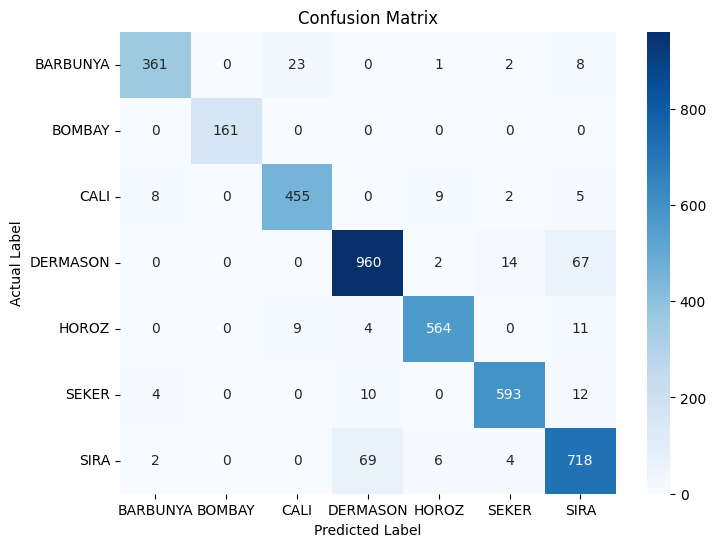

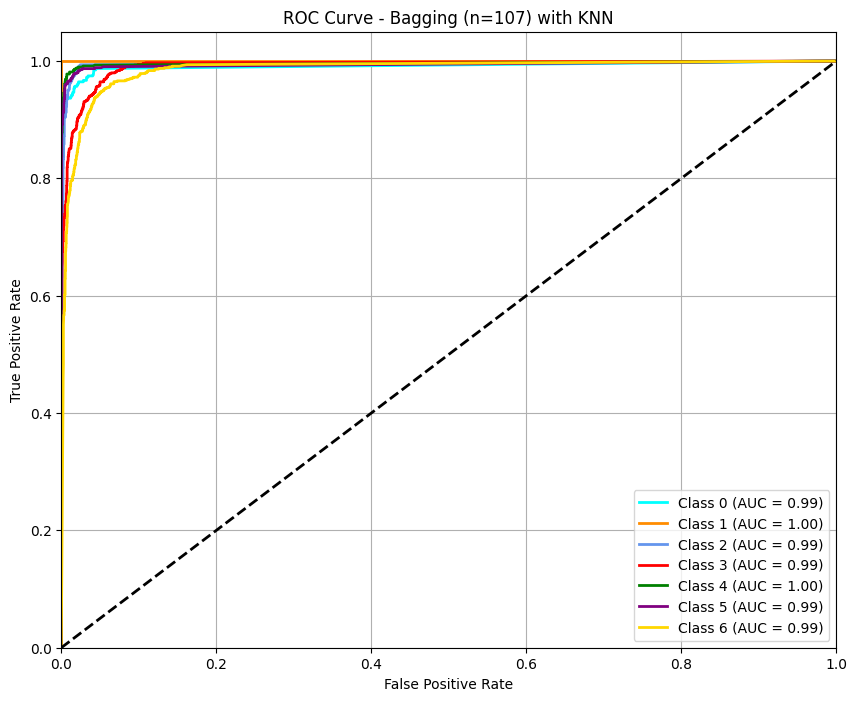

In [5]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np
import seaborn as sns

n_classes = 7
y_test_bin = label_binarize(y_testy, classes=np.arange(n_classes))

# train the Bagging Classifier with KNN
bagging = BaggingClassifier(
    estimator=KNeighborsClassifier(),
    n_estimators=107,
    random_state=42
)

bagging.fit(X_train_noisyy, y_train_noisyy)
y_pred = bagging.predict(X_testy)
y_proba = bagging.predict_proba(X_testy)

cm = confusion_matrix(y_testy, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

# calculate ROC and AUC
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# draw ROC curve for each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'gold'])
plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Bagging (n=107) with KNN')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [6]:
# Part four: Prediction: Training and Testing
# Ensemble-based Classifier - Bagging
# Bagging - Apply Bagging Classifier and SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#noise: 50 0.9349
n_estimators = [50]
for n in n_estimators: 
    bagging = BaggingClassifier(
        estimator=SVC(),  
        n_estimators=n,
        random_state=42
    )

    bagging.fit(X_trainy, y_trainy)
    y_pred = bagging.predict(X_testy)

    acc = accuracy_score(y_testy, y_pred)
    print(f"SVC Bagging (n_estimators={n}) - Test Accuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_testy, y_pred))


SVC Bagging (n_estimators=50) - Test Accuracy: 0.9324

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       395
           1       1.00      1.00      1.00       161
           2       0.94      0.95      0.94       479
           3       0.92      0.92      0.92      1043
           4       0.97      0.96      0.96       588
           5       0.96      0.95      0.95       619
           6       0.88      0.90      0.89       799

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084



In [57]:
# Part four: Prediction: Training and Testing
# Ensemble-based Classifier - Bagging
# Bagging - Apply Bagging Classifier and Logistic Regression
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  

bagging = BaggingClassifier(
    estimator=LogisticRegression(max_iter=1000),  
    n_estimators=100,
    random_state=42
)

bagging.fit(X_train_scaled, y_train)
y_pred = bagging.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Bagging (n_estimators={n}) - Test Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Bagging (n_estimators=100) - Test Accuracy: 0.9266

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       261
           1       1.00      1.00      1.00       117
           2       0.95      0.94      0.94       317
           3       0.92      0.90      0.91       671
           4       0.97      0.96      0.97       408
           5       0.97      0.94      0.95       413
           6       0.85      0.90      0.87       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [58]:
# Part four: Prediction: Training and Testing
# Ensemble-based Classifier - Bagging
# Bagging - Apply Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# build the Extra Trees Classifier 
extra_trees = ExtraTreesClassifier(
    n_estimators=100,
    random_state=42
)
extra_trees.fit(X_train, y_train)

y_pred = extra_trees.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.9210

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       261
           1       1.00      1.00      1.00       117
           2       0.92      0.95      0.93       317
           3       0.90      0.92      0.91       671
           4       0.97      0.95      0.96       408
           5       0.96      0.94      0.95       413
           6       0.86      0.88      0.87       536

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



In [59]:
# Part four: Prediction: Training and Testing
# Ensemble-based Classifier - Boosting
# XGBoost
import xgboost as xgb 
from sklearn.metrics import accuracy_score, classification_report

dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)


params = {
    'objective': 'multi:softmax',  
    'num_class': 7,              
    'learning_rate': 0.01,       
    'max_depth': 12,            
    'subsample': 0.7,             
    'colsample_bytree': 0.7,      
    'seed': 42,                    
    'eval_metric': 'mlogloss'      
}

num_round = 500 
model = xgb.train(params, dtrain, num_round)

y_pred = model.predict(dtest)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.927653323540213

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       261
           1       1.00      1.00      1.00       117
           2       0.94      0.95      0.95       317
           3       0.90      0.92      0.91       671
           4       0.98      0.96      0.97       408
           5       0.96      0.93      0.95       413
           6       0.87      0.89      0.88       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [60]:
# Part four: Prediction: Training and Testing
# Ensemble-based Classifier - Boosting
# CatBoost
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, classification_report


model = CatBoostClassifier(
    iterations=1000,          
    learning_rate=0.1,      
    depth=6,                 
    loss_function='MultiClass', 
    eval_metric='Accuracy',  
    verbose=False,          
    random_state=42
)

model.fit(
    X_train_scaled, y_train,
    eval_set=(X_test_scaled, y_test),
    plot=False,
    early_stopping_rounds=50  
)


y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.932427469702534

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       261
           1       1.00      1.00      1.00       117
           2       0.95      0.96      0.95       317
           3       0.90      0.92      0.91       671
           4       0.97      0.96      0.97       408
           5       0.97      0.94      0.95       413
           6       0.88      0.89      0.88       536

    accuracy                           0.93      2723
   macro avg       0.95      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [63]:
# Part four: Prediction: Training and Testing
# Ensemble-based Classifier - Boosting
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier  



adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=12), 
    n_estimators=200,                           
    learning_rate=0.5,                                                
    random_state=42
)


adaboost.fit(X_train_scaled, y_train)


y_pred = adaboost.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.9254498714652957

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       261
           1       1.00      1.00      1.00       117
           2       0.93      0.95      0.94       317
           3       0.91      0.91      0.91       671
           4       0.97      0.96      0.96       408
           5       0.96      0.94      0.95       413
           6       0.86      0.89      0.87       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [64]:
# Part four: Prediction: Training and Testing
# Ensemble-based Classifier - Boosting
# Classifier Training: Train Random Forest and XGBoost classifiers separately
# Ensemble Classifier：Combine the predicted probabilities of Random Forest and XGBoost
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    random_state=42,
    class_weight='balanced'
)


xgb_clf = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=7,
    learning_rate=0.1,
    max_depth=20,
    subsample=0.8,
    colsample_bytree=0.8,
    seed=42,
    eval_metric='mlogloss'
)


rf_clf.fit(X_train_scaled, y_train)
xgb_clf.fit(X_train_scaled, y_train)

from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[('rf', rf_clf), ('xgb', xgb_clf)],
    final_estimator=LogisticRegression(), 
    cv=5
)
stacking_clf.fit(X_train_scaled, y_train)
y_pred_voting = stacking_clf.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred_voting)
print("Test Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_voting))

Test Accuracy: 0.9280205655526992

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       261
           1       1.00      1.00      1.00       117
           2       0.93      0.95      0.94       317
           3       0.91      0.92      0.91       671
           4       0.97      0.96      0.96       408
           5       0.97      0.93      0.95       413
           6       0.87      0.90      0.88       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [ ]:
# Part four: Prediction: Training and Testing
# Exploration: BLSMOTE + K-means + SVM

from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.metrics import accuracy_score, classification_report

class_counts = Counter(y_train)

sampling_strategy = {
    0: int(class_counts[0] * 1.2),
    2: int(class_counts[2] * 1.2),
    3: int(class_counts[3] * 1.2)
}


class ClusterAugmenter(BaseEstimator, TransformerMixin):
    def __init__(self, cluster_model):
        self.cluster_model = cluster_model
        
    def fit(self, X_train_scaled, y=None):
        self.cluster_model.fit(X_train_scaled)
        return self
        
    def transform(self, X_train_scaled):
        clusters = self.cluster_model.predict(X_train_scaled).reshape(-1, 1)
        return np.hstack([X_train_scaled, clusters])


pipeline = Pipeline([
    ('blsmote', BorderlineSMOTE(
    sampling_strategy=sampling_strategy,
    k_neighbors=6,  
    kind='borderline-2', 
    m_neighbors=8,  
    random_state=41)),
    ('cluster_augmenter', ClusterAugmenter(KMeans(n_clusters=7, random_state=41))),
    ('svm', SVC(class_weight='balanced', kernel='rbf', C=1, gamma=0.4, random_state=42))
])


pipeline.fit(X_train_scaled, y_train)


# Extract the individual components from the pipeline
blsmote = pipeline.named_steps['blsmote']
cluster_augmenter = pipeline.named_steps['cluster_augmenter']
svm = pipeline.named_steps['svm']

# Predict on the training set
X_train_clustered = cluster_augmenter.transform(X_train_scaled)
y_pred_train = svm.predict(X_train_clustered) 
print("\ntraining set classification report： ")
accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy:", accuracy)
print(classification_report(y_train, y_pred_train))

# Predict on the test set
X_test_clustered = cluster_augmenter.transform(X_test_scaled)
y_pred_test = svm.predict(X_test_clustered)
print("\n test set classification report： ")
accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy)
print(classification_report(y_test, y_pred_test))

# oversampling
print("\n original training set distribution:", Counter(y_train))
X_train_resampled, y_train_resampled = blsmote.fit_resample(X_train_scaled, y_train) 
print("training set distribution after over sampling:", Counter(y_train_resampled))

c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.




training set classification report： 
Train Accuracy: 0.9413115356355621
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1061
           1       1.00      1.00      1.00       405
           2       0.96      0.97      0.96      1313
           3       0.91      0.96      0.93      2875
           4       0.98      0.95      0.97      1520
           5       0.96      0.96      0.96      1614
           6       0.92      0.85      0.89      2100

    accuracy                           0.94     10888
   macro avg       0.95      0.95      0.95     10888
weighted avg       0.94      0.94      0.94     10888


 test set classification report： 
Test Accuracy: 0.9265515975027543
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       261
           1       1.00      1.00      1.00       117
           2       0.93      0.93      0.93       317
           3       0.90      0.94      0.92 

c:\Users\DFVJGJ\anaconda3\envs\ml_env\Lib\site-packages\sklearn\base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.



C:\Users\DFVJGJ\AppData\Local\Temp\ipykernel_10080\221172668.py:29: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



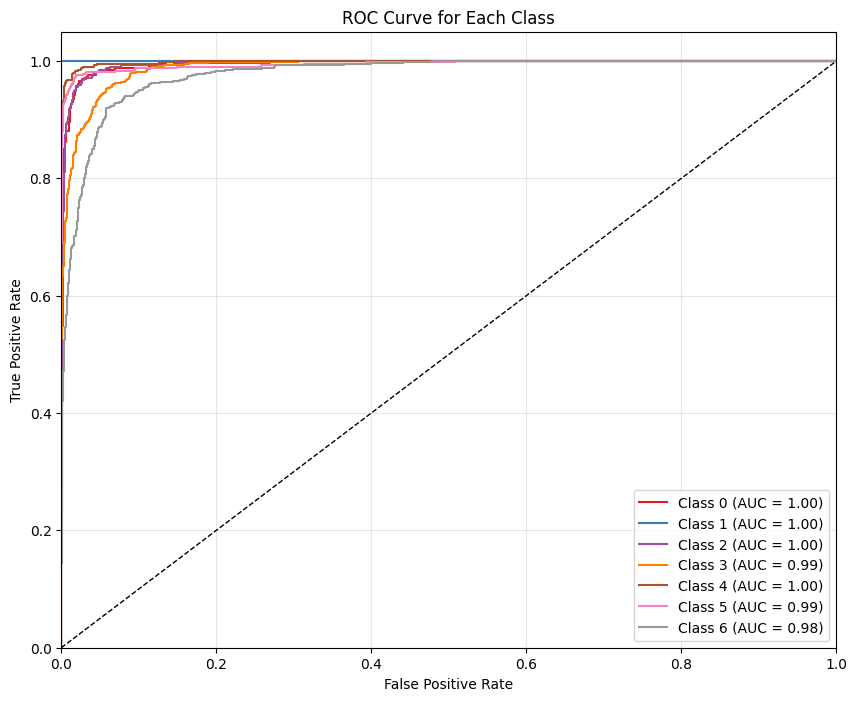

In [68]:
# Part five: Evaluation and Choice of Prediction Model
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


n_classes = 7

clf = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=1000))
clf.fit(X_train_scaled, y_train)

y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
y_score = clf.decision_function(X_test_scaled)  

# 2. Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 3. Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('Set1', n_classes)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label=f"Class {i} (AUC = {roc_auc[i]:.2f})",
             color=colors(i))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Class")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
